1. Explore and discuss the relatioships among selected weather features (of your choice) and target variables (i.e., pu_ct and do_ct in the preprocessed data), possibly utlizing visualizations like a scatterplot matrix.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sn

In [2]:
import glob

In [3]:
csv_files = glob.glob("/Users/arnabraychaudhari/Documents/Private/Advanced Studies/MS Applications/MSBA Applications/GW MSBA/SEM 2/ML-I/Group-Assignment/Final Project/*.csv")

In [4]:
df = pd.concat((pd.read_csv(f) for f in csv_files), ignore_index=True)

In [5]:
df.to_csv("merged.csv", index=False)

In [6]:
df = pd.read_csv(r"/Users/arnabraychaudhari/Documents/Private/Advanced Studies/MS Applications/MSBA Applications/GW MSBA/SEM 2/ML-I/Group-Assignment/Final Project/merged.csv", index_col=None); df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,5F3D280238A782FE,docked_bike,2023-05-12 18:57:59,2023-05-12 19:17:50,3rd & Tingey St SE,31634.0,8th & F St NE,31631.0,38.875010,-77.002400,38.897274,-76.994749,casual
1,97EC218DACB24849,classic_bike,2023-05-23 07:55:29,2023-05-23 08:11:12,Clarendon Blvd & Pierce St,31016.0,15th & L St NW,31276.0,38.893438,-77.076389,38.903649,-77.034918,member
2,31D19AC7BA317018,electric_bike,2023-05-05 17:27:10,2023-05-05 17:40:17,South Capitol St and Southern Ave SE,31830.0,Tanger Outlets,32415.0,38.821667,-77.001627,38.796800,-77.002600,member
3,18064EB7133720BF,classic_bike,2023-05-09 11:22:05,2023-05-09 11:35:11,11th & O St NW,31286.0,19th St & Pennsylvania Ave NW,31100.0,38.908431,-77.027088,38.900300,-77.042900,member
4,02E47B545236B208,classic_bike,2023-05-06 10:24:09,2023-05-06 10:35:13,11th & O St NW,31286.0,16th & Harvard St NW,31135.0,38.908431,-77.027088,38.926102,-77.036650,casual


In [7]:
# Transform time to date ONLY
df['started_at_date'] = pd.to_datetime(df['started_at']).dt.date
df['ended_at_date'] = pd.to_datetime(df['ended_at']).dt.date
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,started_at_date,ended_at_date
0,5F3D280238A782FE,docked_bike,2023-05-12 18:57:59,2023-05-12 19:17:50,3rd & Tingey St SE,31634.0,8th & F St NE,31631.0,38.875010,-77.002400,38.897274,-76.994749,casual,2023-05-12,2023-05-12
1,97EC218DACB24849,classic_bike,2023-05-23 07:55:29,2023-05-23 08:11:12,Clarendon Blvd & Pierce St,31016.0,15th & L St NW,31276.0,38.893438,-77.076389,38.903649,-77.034918,member,2023-05-23,2023-05-23
2,31D19AC7BA317018,electric_bike,2023-05-05 17:27:10,2023-05-05 17:40:17,South Capitol St and Southern Ave SE,31830.0,Tanger Outlets,32415.0,38.821667,-77.001627,38.796800,-77.002600,member,2023-05-05,2023-05-05
3,18064EB7133720BF,classic_bike,2023-05-09 11:22:05,2023-05-09 11:35:11,11th & O St NW,31286.0,19th St & Pennsylvania Ave NW,31100.0,38.908431,-77.027088,38.900300,-77.042900,member,2023-05-09,2023-05-09
4,02E47B545236B208,classic_bike,2023-05-06 10:24:09,2023-05-06 10:35:13,11th & O St NW,31286.0,16th & Harvard St NW,31135.0,38.908431,-77.027088,38.926102,-77.036650,casual,2023-05-06,2023-05-06


In [8]:
# Group and get pickup occurrence for 22nd & H St NW
df_sub1 = df[df['start_station_name']=="22nd & H St NW"]
df_grp1 = df_sub1.groupby(['started_at_date','start_station_name']).size()
df_pu=df_grp1.reset_index(name = "pu_ct")
df_pu.head()

,started_at_date,start_station_name,pu_ct
0,2023-02-01,22nd & H St NW,20
1,2023-02-02,22nd & H St NW,26
2,2023-02-03,22nd & H St NW,14
3,2023-02-04,22nd & H St NW,12
4,2023-02-05,22nd & H St NW,17


In [9]:
# Group and get drop off occurrence for 22nd & H St NW
df_sub2 = df[df['end_station_name']=="22nd & H St NW"]
df_grp2 = df_sub2.groupby(['ended_at_date','end_station_name']).size()
df_do=df_grp2.reset_index(name = "do_ct")
df_do.head()

,ended_at_date,end_station_name,do_ct
0,2023-02-01,22nd & H St NW,24
1,2023-02-02,22nd & H St NW,28
2,2023-02-03,22nd & H St NW,17
3,2023-02-04,22nd & H St NW,13
4,2023-02-05,22nd & H St NW,24


Weather Data

In [10]:
### Download Weather Data
df_weather = pd.read_csv('/Users/arnabraychaudhari/Documents/Private/Advanced Studies/MS Applications/MSBA Applications/GW MSBA/SEM 2/ML-I/Group-Assignment/Final Project/weatherdata.csv')

# Date time format
df_weather['datetime'] = pd.to_datetime(df_weather['datetime']).dt.date

df_weather.head()

,name,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,...,solarenergy,uvindex,severerisk,sunrise,sunset,moonphase,conditions,description,icon,stations
0,"washington, dc",2023-01-01,61.4,43.5,51.8,61.4,41.7,51.2,46.2,82.2,...,8.7,4,10,2023-01-01T07:26:52,2023-01-01T16:56:42,0.32,"Rain, Partially cloudy",Clearing in the afternoon with morning rain.,rain,"KDCA,72405013743,72403793728,KADW,KDAA,AS365,7..."
1,"washington, dc",2023-01-02,63.0,40.0,50.9,63.0,36.3,50.2,44.2,79.3,...,5.7,4,10,2023-01-02T07:26:59,2023-01-02T16:57:31,0.35,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"KDCA,72405013743,72403793728,KADW,KDAA,AS365,7..."
2,"washington, dc",2023-01-03,68.0,50.1,59.3,68.0,50.1,59.3,52.3,78.5,...,3.4,2,10,2023-01-03T07:27:04,2023-01-03T16:58:22,0.39,Overcast,Cloudy skies throughout the day.,cloudy,"KDCA,72405013743,72403793728,KADW,KDAA,AS365,7..."
3,"washington, dc",2023-01-04,65.0,53.3,59.5,65.0,53.3,59.5,55.0,85.4,...,2.8,2,10,2023-01-04T07:27:07,2023-01-04T16:59:14,0.42,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"KDCA,72405013743,72403793728,KADW,KDAA,AS365,7..."
4,"washington, dc",2023-01-05,64.0,49.6,56.4,64.0,45.1,55.9,46.0,70.4,...,6.0,4,10,2023-01-05T07:27:08,2023-01-05T17:00:08,0.46,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"KDCA,72405013743,72403793728,KADW,KDAA,AS365,7..."


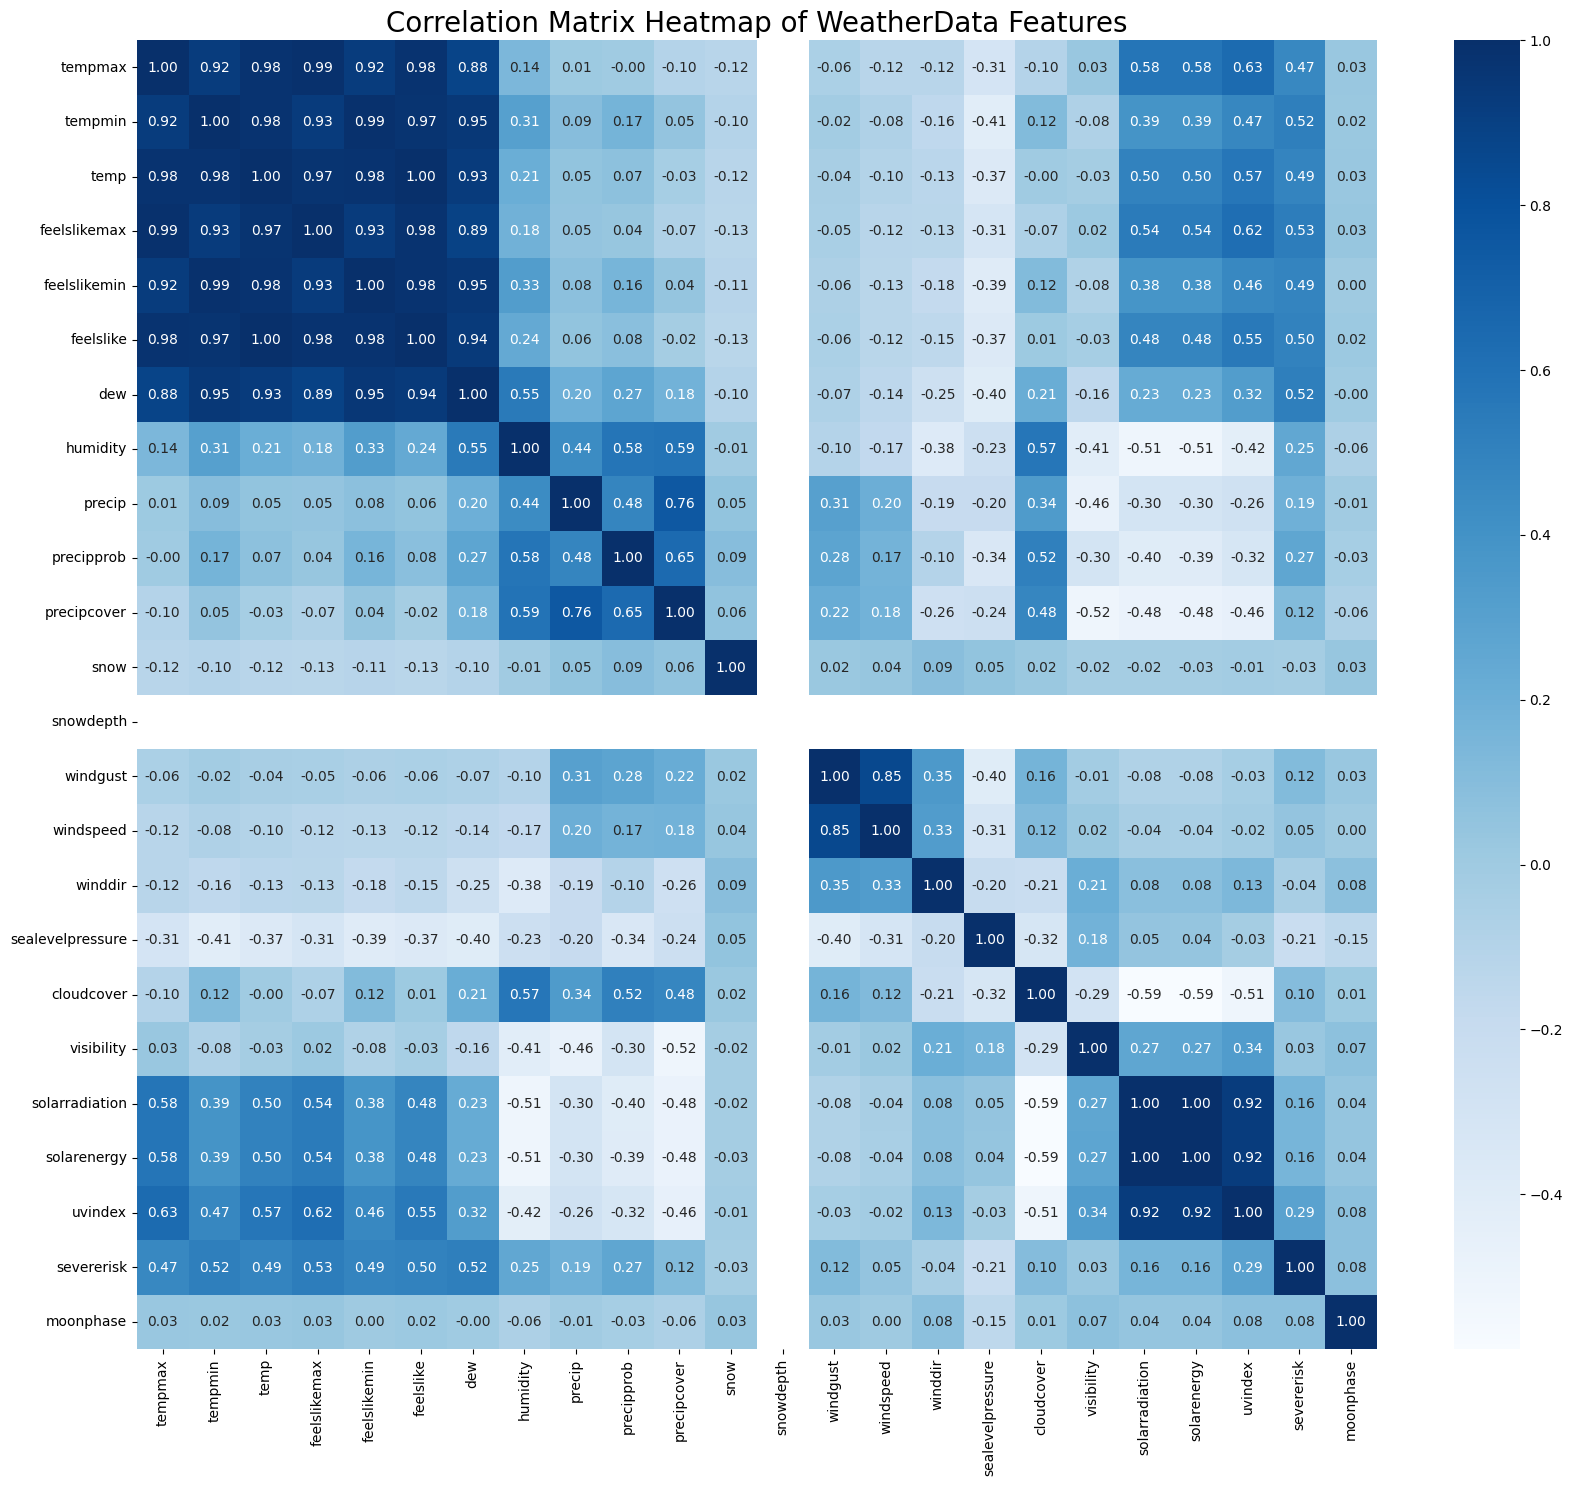

In [11]:
### Plot correlation matrix
df_weather_corr = pd.DataFrame.corr(df_weather.drop(columns=['datetime','name']).select_dtypes('number').dropna(axis = 0, how='all'))
plt.figure(figsize = (20,17))
sn.heatmap(df_weather_corr, annot=True, fmt='.2f', cmap = 'Blues').set_title("Correlation Matrix Heatmap of WeatherData Features", fontsize = 20)
plt.show()

Correlation Matrix Interpretation
tempmax is highly correlated (> 80%) with tempmin, temp, feelslikemax, feelslikemin, feelslike, dew, thus suggesting multicollinearity.
windspeed is highly correlated (> 80%) with windgust, thus suggesting multicollinearity.
solarradiation is highly correlated (> 80%) with solarenergy, uvindex, thus suggesting multicollinearity.
The feature filtering below selects only one of the variables where correlation between variables > 0.8, thus reducing the effect of multicollinearity.
Features Selection : Pearson's Correlation Filtering between features

In [12]:
# Feature Selection: Pearson's Correlation Filtering between features
df_weather_corr = pd.DataFrame.corr(df_weather.select_dtypes('number'))  # Defaults to Pearson's Correlation
corr_features = set()

for i in range(len(df_weather_corr.columns)):
    for j in range(i):
        if abs(df_weather_corr.iloc[i,j]) > 0.8:
            colname = df_weather_corr.columns[i]
            corr_features.add(colname)
print("Highly Correlated Features being removed: ", corr_features)

# Drop highly correlated variables
df_weather.drop(columns=corr_features, inplace= True)

Highly Correlated Features being removed:  {'dew', 'feelslike', 'feelslikemin', 'feelslikemax', 'tempmin', 'uvindex', 'windspeed', 'solarenergy', 'temp'}


Text(0.5, 1.0, 'Boxplot of WeatherData Features')

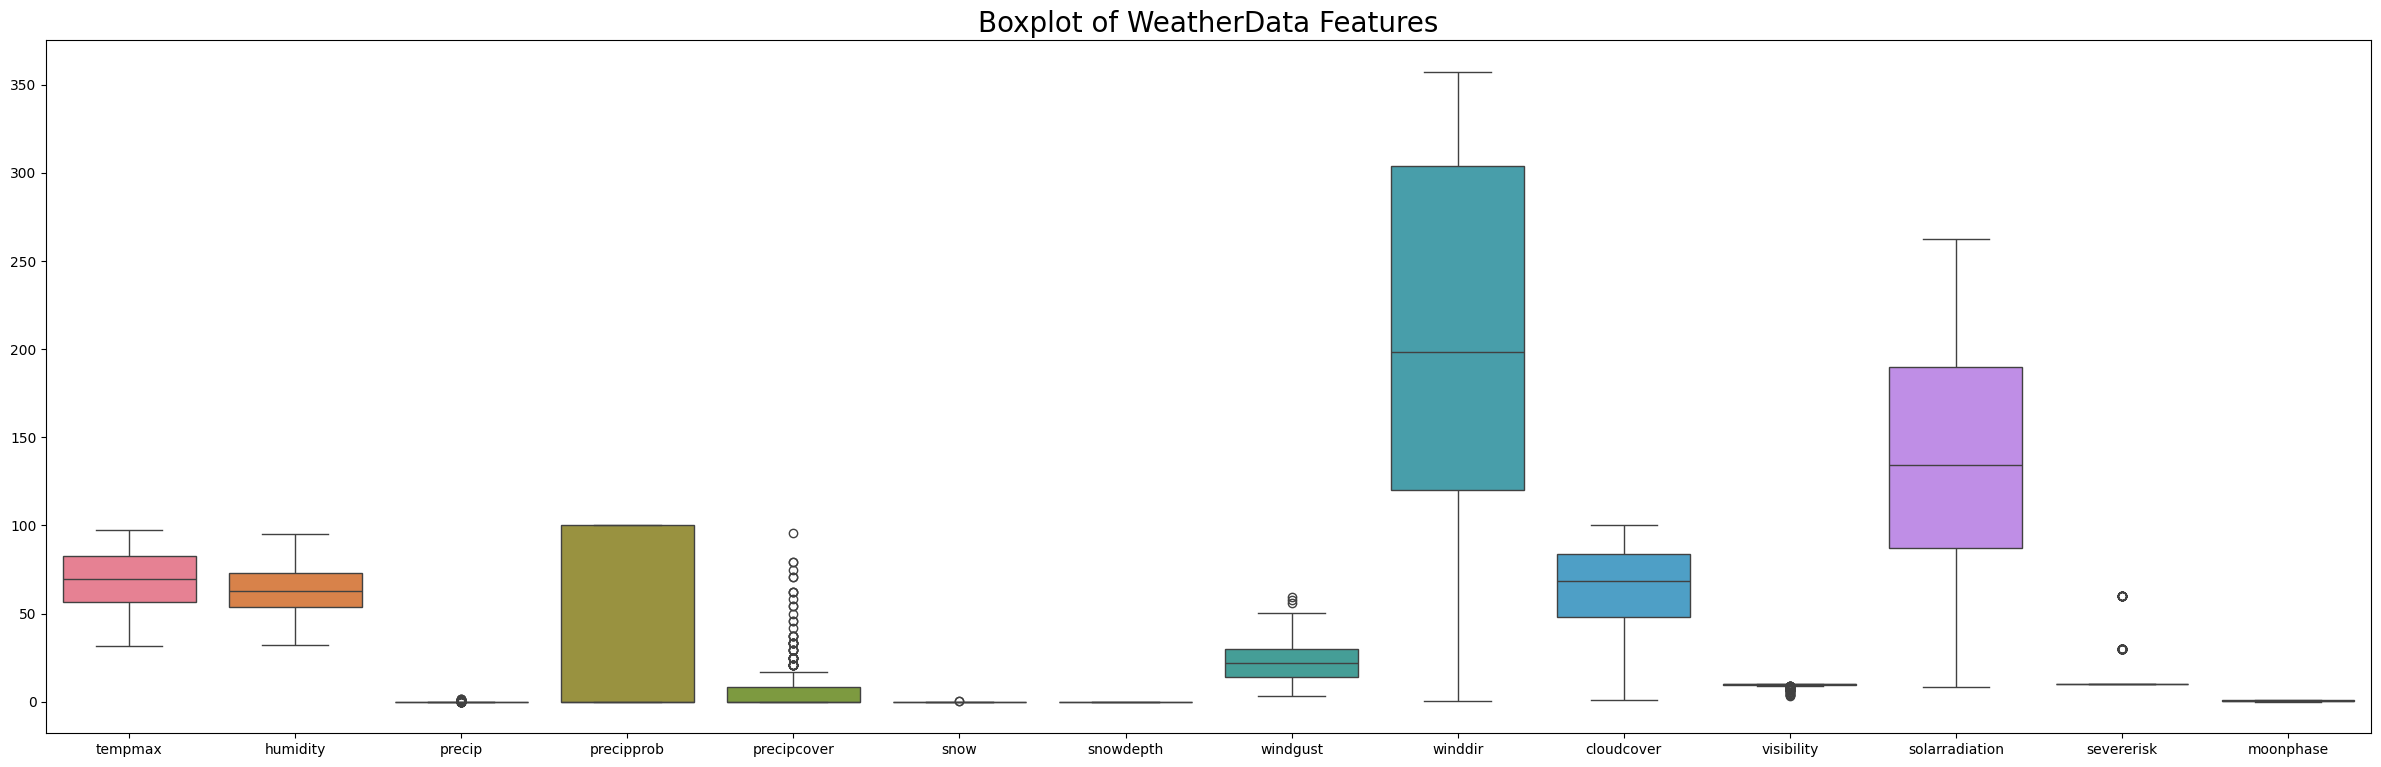

In [13]:
# boxplot of features
plt.figure(figsize = (30,9))
sn.boxplot(data = df_weather.drop(columns='sealevelpressure')).set_title("Boxplot of WeatherData Features", fontsize = 20)

Boxplot Interpretation: 
Precip, precipprob, precipcover, snow, snowdepth, visibility, severerisk, windgust and moonphase are further analyzed based on data symmmetry, skewness, and tight grouping.

<Axes: >

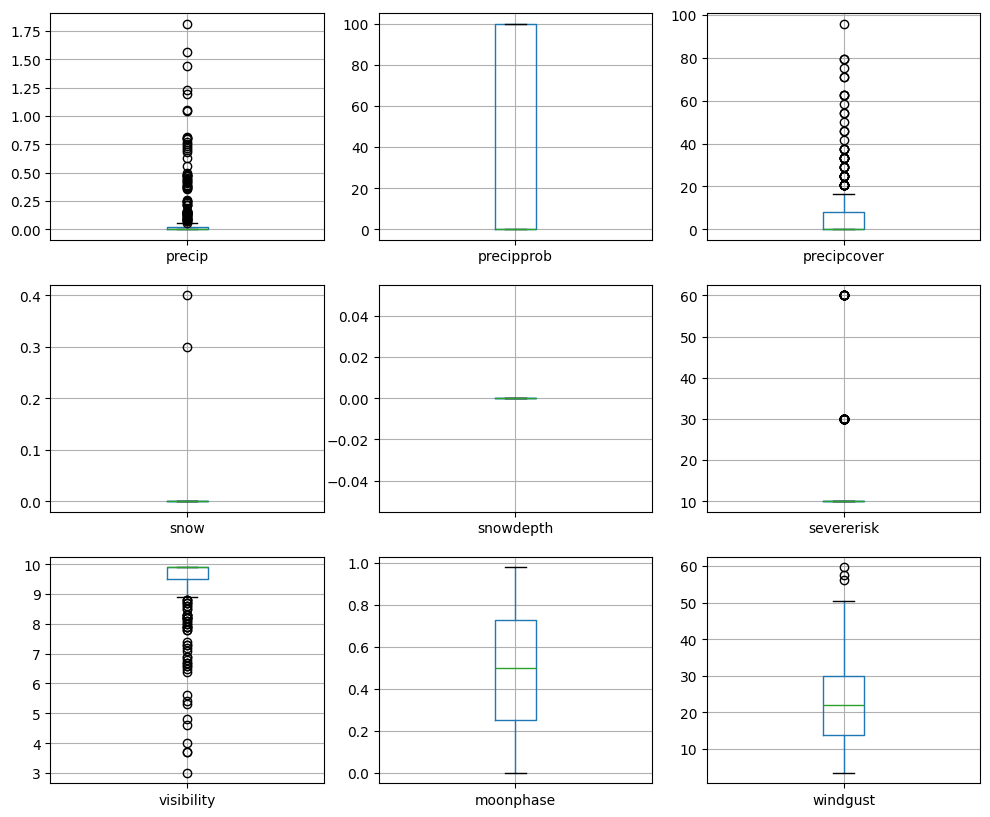

In [14]:
#  Boxplots of select features
fig, axes  = plt.subplots(3,3, figsize = (12,10), sharex = False, sharey = False)
df_weather.boxplot(column = 'precip', ax = axes[0,0])
df_weather.boxplot(column = 'precipprob', ax = axes[0,1])
df_weather.boxplot(column = 'precipcover', ax = axes[0,2])
df_weather.boxplot(column = 'snow', ax = axes[1,0])
df_weather.boxplot(column = 'snowdepth', ax = axes[1,1])
df_weather.boxplot(column = 'severerisk', ax = axes[1,2])
df_weather.boxplot(column = 'visibility', ax = axes[2,0])
df_weather.boxplot(column = 'moonphase', ax = axes[2,1])
df_weather.boxplot(column = 'windgust', ax = axes[2,2])

Further Boxplot Interpretation:
Precip, precipprob, precipcover, snow, snowdepth, visibility, severerisk are removed from the dataset based on data symmmetry, skewness, and tight grouping.

In [15]:
# drop variables based on boxplot interpretation
df_weather.drop(columns=['name', 'stations','description','sunrise','sunset','conditions','preciptype','precip','precipprob','precipcover','snow','snowdepth','severerisk','visibility'], inplace= True); df_weather.head()

,datetime,tempmax,humidity,windgust,winddir,sealevelpressure,cloudcover,solarradiation,moonphase,icon
0,2023-01-01,61.4,82.2,13.9,199.3,1015.4,47.7,100.5,0.32,rain
1,2023-01-02,63.0,79.3,10.3,190.8,1019.8,87.8,65.3,0.35,partly-cloudy-day
2,2023-01-03,68.0,78.5,29.3,196.2,1014.1,90.8,38.6,0.39,cloudy
3,2023-01-04,65.0,85.4,31.1,194.4,1010.4,85.2,32.2,0.42,partly-cloudy-day
4,2023-01-05,64.0,70.4,13.9,231.5,1013.3,75.8,71.1,0.46,partly-cloudy-day


Text(0.5, 1.0, 'Scatterplot of WeatherData Features')

<Figure size 1500x900 with 0 Axes>

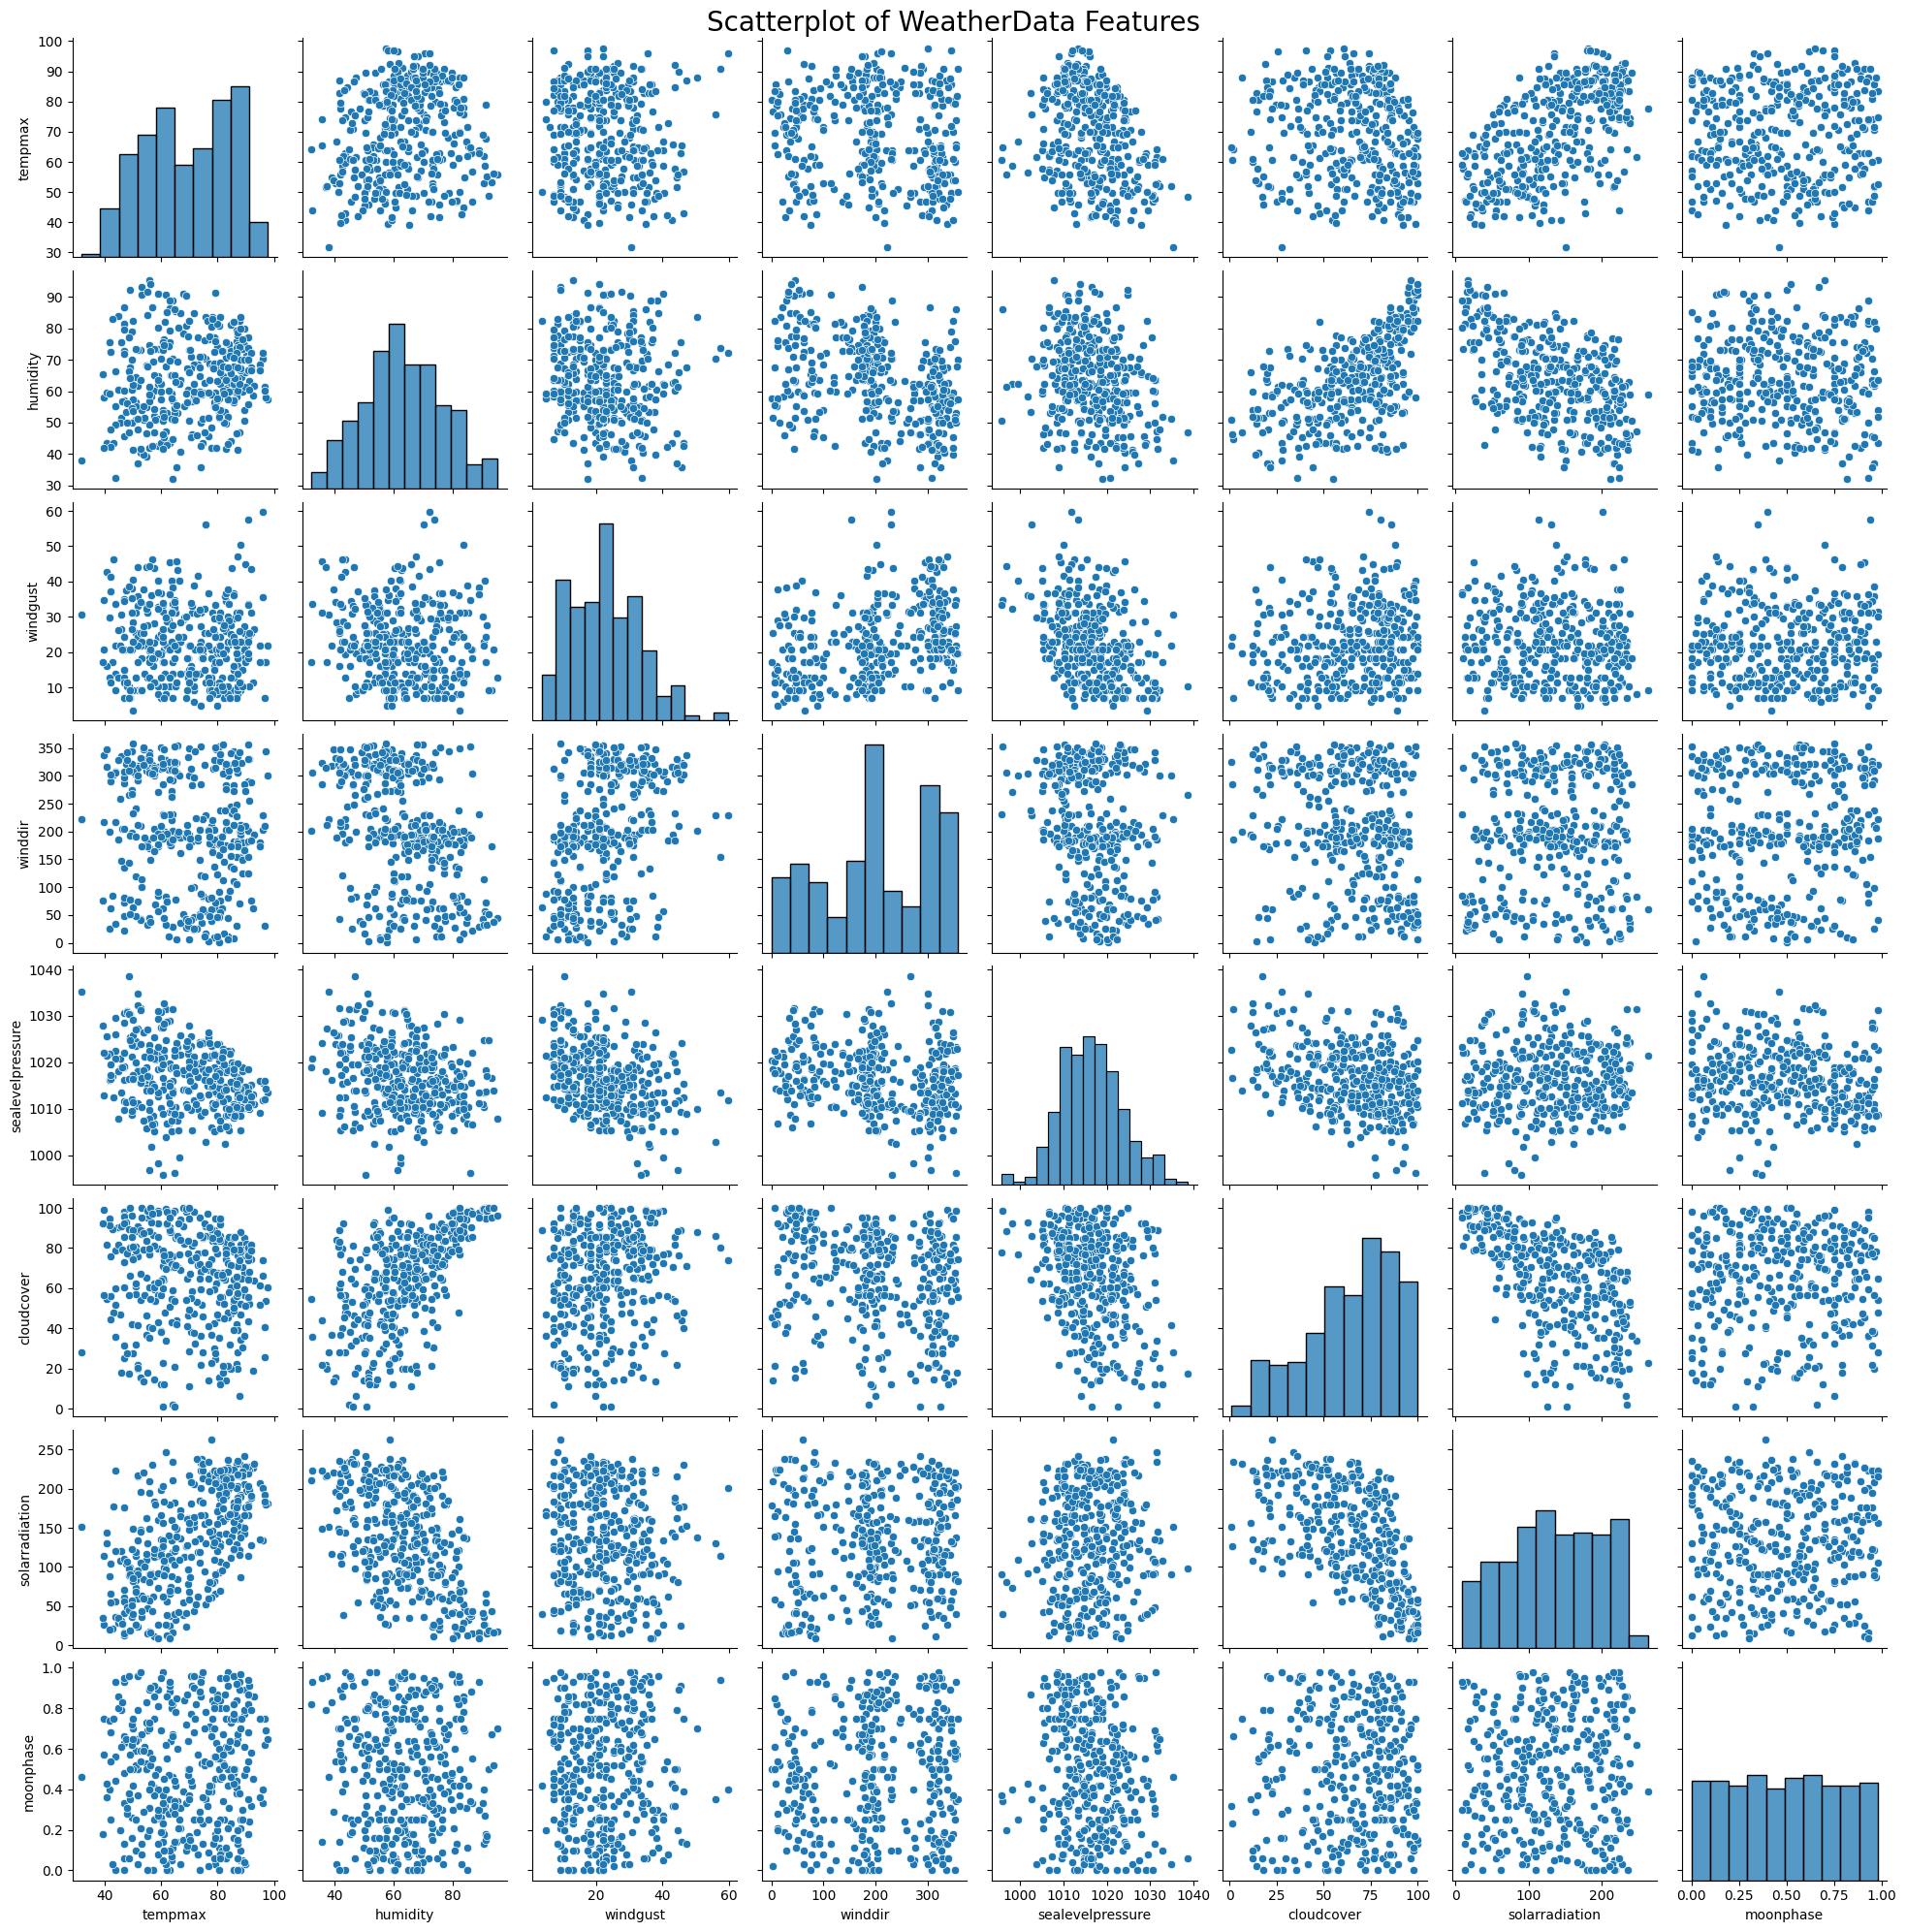

In [16]:
#  Pairplot of filtered features
Final_weather = df_weather
plt.figure(figsize = (15,9))
sn.pairplot(Final_weather).fig.suptitle("Scatterplot of WeatherData Features", fontsize = 20, y = 1.00)

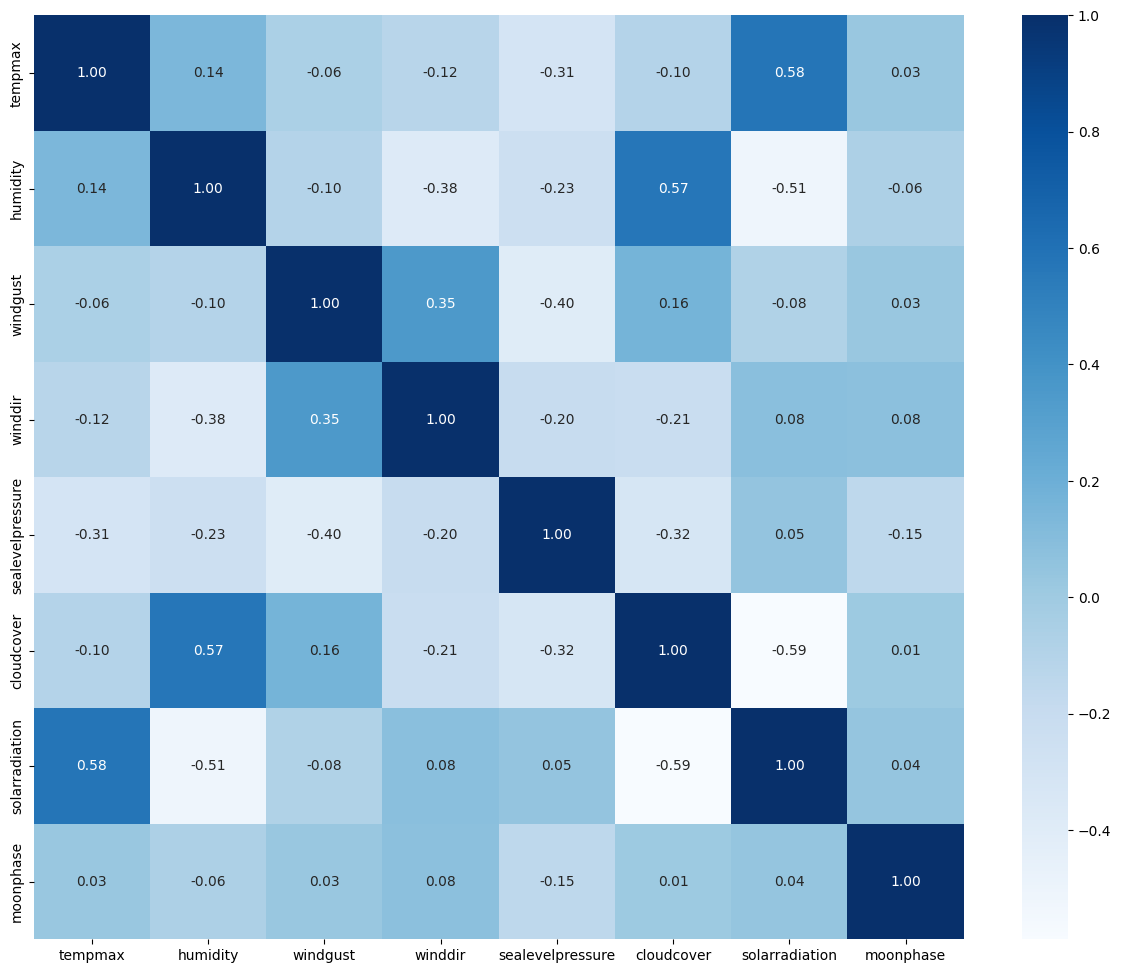

In [17]:
### Plot correlation matrix
df_weather_corr = pd.DataFrame.corr(Final_weather.drop(columns='datetime').select_dtypes('number'))
plt.figure(figsize = (15,12))
sn.heatmap(df_weather_corr, annot=True, fmt='.2f', cmap = 'Blues')
plt.show()

Prepare X and y: Merge weather data with trip data

In [18]:
# Merge with weather data and remove dates and station name
# pickup data
df_m_pu = df_pu.merge(Final_weather, left_on='started_at_date', right_on='datetime')
df_m_pu = df_m_pu.drop(columns=['started_at_date','start_station_name','datetime'])
df_m_pu.head()

,pu_ct,tempmax,humidity,windgust,winddir,sealevelpressure,cloudcover,solarradiation,moonphase,icon
0,20,40.7,59.4,16.1,347.8,1025.5,81.8,130.3,0.36,snow
1,26,41.8,59.2,12.8,199.9,1021.8,94.5,87.7,0.40,cloudy
2,14,40.7,43.4,42.7,317.1,1021.4,54.6,143.9,0.43,partly-cloudy-day
3,12,31.9,37.9,30.6,221.9,1035.2,27.8,150.7,0.46,partly-cloudy-day
4,17,58.8,42.6,32.9,195.8,1022.1,79.7,116.1,0.50,partly-cloudy-day


In [19]:
# Merge with weather data and remove dates and station name
# dropoff data
df_m_do = df_do.merge(Final_weather, left_on='ended_at_date', right_on='datetime')
df_m_do = df_m_do.drop(columns=['ended_at_date','end_station_name','datetime'])
df_m_do.head()

,do_ct,tempmax,humidity,windgust,winddir,sealevelpressure,cloudcover,solarradiation,moonphase,icon
0,24,40.7,59.4,16.1,347.8,1025.5,81.8,130.3,0.36,snow
1,28,41.8,59.2,12.8,199.9,1021.8,94.5,87.7,0.40,cloudy
2,17,40.7,43.4,42.7,317.1,1021.4,54.6,143.9,0.43,partly-cloudy-day
3,13,31.9,37.9,30.6,221.9,1035.2,27.8,150.7,0.46,partly-cloudy-day
4,24,58.8,42.6,32.9,195.8,1022.1,79.7,116.1,0.50,partly-cloudy-day


In [20]:
# Feature Selection: Pearson's Correlation Filtering between features and target variables (Daily Pickups (PU) and Dropoffs (DO))
Features = Final_weather.copy()
Features = pd.concat([Final_weather,df_m_pu['pu_ct'], df_m_do['do_ct']], axis = 1, join='inner')

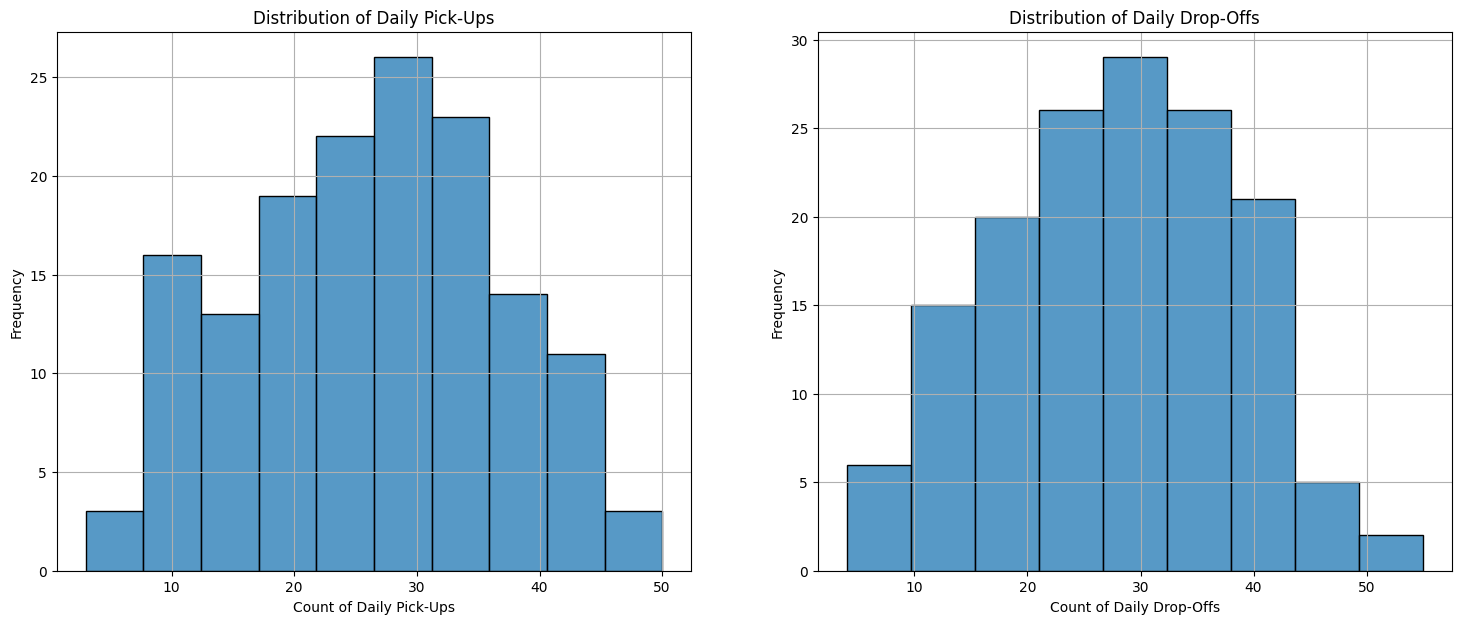

In [21]:
fig = plt.figure(figsize=(18,7))
ax1 = fig.add_subplot(121); ax2 = fig.add_subplot(122)
sn.histplot(data = Features, x = "pu_ct",  ax = ax1)
sn.histplot(data = Features, x = "do_ct",  ax = ax2)
ax1.set_title("Distribution of Daily Pick-Ups")
ax2.set_title("Distribution of Daily Drop-Offs")
ax2.set_xlabel('Count of Daily Drop-Offs')
ax2.set_ylabel('Frequency')
ax1.set_xlabel('Count of Daily Pick-Ups')
ax1.set_ylabel('Frequency')
ax1.grid()
ax2.grid()
plt.show()

Feature Selection: Pearson's Correlation filtering between features and target variables (Daily Pickups (PU) and Dropoffs (DO))

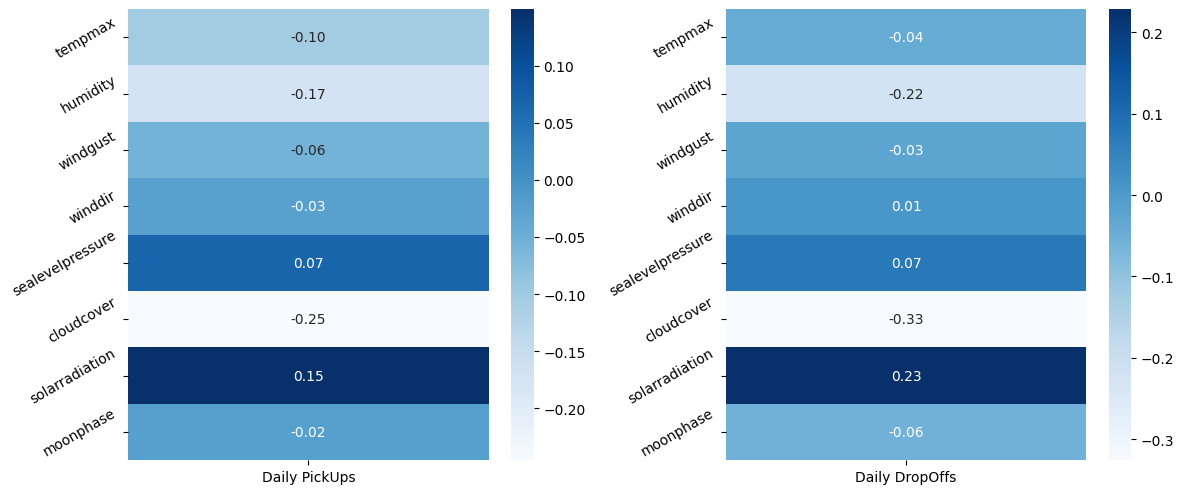

In [22]:
# Correlation Filtering between features and Daily Pickups
Features_Targets = Features.rename(columns={'pu_ct':'Daily PickUps','do_ct':'Daily DropOffs'})
Features_PU_corrMatrix = pd.DataFrame.corr(pd.DataFrame.corr(Features_Targets.drop(columns=['datetime','Daily DropOffs']).select_dtypes('number')))
PU_corr_target = Features_PU_corrMatrix[['Daily PickUps']].drop('Daily PickUps')

# Correlation Filtering between features and Daily Dropoffs
Features_DO_corrMatrix = pd.DataFrame.corr(pd.DataFrame.corr(Features_Targets.drop(columns=['datetime','Daily PickUps']).select_dtypes('number')))
DO_corr_target = Features_DO_corrMatrix[['Daily DropOffs']].drop('Daily DropOffs')

fig = plt.figure(figsize=(12,5))
ax1 = fig.add_subplot(121); ax2 = fig.add_subplot(122)
sn.heatmap(PU_corr_target, annot=True, fmt='.2f', cmap = 'Blues', ax = ax1)
sn.heatmap(DO_corr_target, annot=True, fmt='.2f', cmap = 'Blues', ax = ax2)
fig.tight_layout(pad = 0.9)
ax1.tick_params('y',labelrotation = 30)
ax2.tick_params('y',labelrotation = 30)
plt.show()

In [23]:
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import mutual_info_regression

# Feature Selection: Mutual Information
# PickUps
MI_PickUp_y = df_m_pu['pu_ct']
MI_PickUp_x = df_m_pu.drop('pu_ct',axis=1)
MI_PickUp_x = pd.get_dummies(data=MI_PickUp_x, drop_first=True)
MI_PickUp = pd.DataFrame(mutual_info_regression(MI_PickUp_x, MI_PickUp_y, discrete_features=[8,9,10,11], random_state=68).reshape(1,12), columns= MI_PickUp_x.columns)
MI_PickUp.rename(index = {0:'Mutual_Information'}, inplace= True); MI_PickUp

,tempmax,humidity,windgust,winddir,sealevelpressure,cloudcover,solarradiation,moonphase,icon_cloudy,icon_partly-cloudy-day,icon_rain,icon_snow
Mutual_Information,0.07502,0.0,0.0,0.088493,0.0,0.060048,0.135344,0.0,0.0,0.0,0.0,0.0


In [24]:
# DropOffs
MI_DropOff_y = df_m_do['do_ct']
MI_DropOff_x = df_m_do.drop('do_ct',axis=1)
MI_DropOff_x = pd.get_dummies(data=MI_DropOff_x, drop_first=True)
MI_DropOff = pd.DataFrame(mutual_info_regression(MI_DropOff_x, MI_DropOff_y, discrete_features=[8,9,10,11], random_state=68).reshape(1,12), columns= MI_DropOff_x.columns)
MI_DropOff.rename(index = {0:'Mutual_Information'}, inplace= True); MI_DropOff

,tempmax,humidity,windgust,winddir,sealevelpressure,cloudcover,solarradiation,moonphase,icon_cloudy,icon_partly-cloudy-day,icon_rain,icon_snow
Mutual_Information,0.125709,0.063672,0.044314,0.102407,0.0,0.186292,0.154916,0.005099,0.0,0.047816,0.048316,0.0


Further selection filtering based on relationship between independent variables and dependent variable

PickUps

As seen in the heatmap, Cloudcover, Humidity, Solarradiaton are fairly correlated with daily pickups. Moonphase and Winddir have very low correlation with daily pickups. Before removing Moonphase and Winddir in daily pickups, we consider the possibility the very low correlation between these variables and daily pickups could be due to a non-linear relationship. It becomes necessary to use a feature filter method that does not assume a linear functional form between the target variables and the features.
For daily pickups, Moonphase has a mutual information of 0 and Winddir has a non-zero mutual information. Thus, moonphase will be removed from predicting daily pickups.

DropOffs

As seen in the heatmap, Cloudcover, Humidity, Solarradiaton are fairly correlated with dropoffs. Moonphase, Winddir, and Windgust have very low correlation with daily dropoffs. Before removing moonphase in daily dropoffs. Before removing Moonphase, Winddir, and Windgust, we consider the possibility the very low correlation between these variables and daily dropoffs could be due to a non-linear relationship. It becomes necessary to use a feature filter method that does not assume a linear functional form between the target variables and the features.

For daily dropoffs, Moonphase, Winddir, and Windgust all have a non-zero mutual information.

Using Mutual Information (a measure of dependence between two variables), we can work with both categorical and continuous variables, although categorical variables need to be numerically encoded first. The higher the value of the mutual information, the more predictive power is assumed. Features with 0 mutual information are largely independent (no relationship) with the target variable. Mutual Information detects non-linear relationships.

Number of features for prediction of daily pickups (11): tempmax, humidity, windgust, winddir, sealevelpressure, cloudcover, solarradiation, icon_cloudy, icon_partly-cloudy-day, icon_rain, icon_snow.

Number of features for prediction of daily dropoffs (11): tempmax, humidity, windgust, winddir, sealevelpressure, cloudcover, solarradiation, icon_cloudy, icon_partly-cloudy-day, icon_rain, icon_snow.

In [25]:
# Drop moonphase for both pick-ups and drop-offs
df_m_pu.drop(columns = 'moonphase', inplace = True)
df_m_do.drop(columns = 'moonphase', inplace = True)

# Summary Statistics for Continuous Variables
Features = Features.drop(columns = ['moonphase','datetime'])
Features.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
tempmax,150.0,62.038667,12.619394,31.9,51.900,61.75,72.950,87.9
humidity,150.0,60.188667,14.345748,32.1,49.400,59.45,71.000,91.0
windgust,150.0,24.854000,9.965205,5.8,17.200,23.60,31.200,56.1
winddir,150.0,205.148667,101.341179,10.2,125.250,198.85,303.675,354.1
sealevelpressure,150.0,1017.051333,7.068198,995.8,1012.625,1017.55,1021.900,1035.2
cloudcover,150.0,67.171333,23.442093,2.0,52.700,72.70,85.925,100.0
solarradiation,150.0,131.514000,68.164906,12.8,70.475,135.20,196.075,246.6
pu_ct,150.0,26.200000,10.470797,3.0,19.250,27.00,33.000,50.0
do_ct,150.0,27.566667,10.506257,4.0,19.000,28.50,35.000,55.0


In [26]:
# Summary Statistics for Categorical Variable Icon
Features['icon'].value_counts()

icon
partly-cloudy-day    84
rain                 54
clear-day             6
cloudy                5
snow                  1
Name: count, dtype: int64

2. Build a series of linear regression models: begin with a single feature (e.g., 'temp') and progressively incorporate addiEonal features ('temp', 'precip', 'humidity', 'windspeed', 'uvindex', 'dew', etc.). Display and analyze the changes in training and test Mean Squared Errors (MSEs) when introducing more features in a plot (e.g., in line chart) for pu_ct and do_ct, respecEvely.

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

Running Series of Linear Regression Models

In [28]:
##### Linear Regression
# PickUps
y_PickUps = df_m_pu['pu_ct']
X_PickUps = df_m_pu.drop('pu_ct',axis=1)
X_PickUps = pd.get_dummies(data=X_PickUps, drop_first=True)
X_PickUps.head()

# DropOffs
y_DropOffs = df_m_do['do_ct']
X_DropOffs = df_m_do.drop('do_ct',axis=1)
X_DropOffs = pd.get_dummies(data=X_DropOffs, drop_first=True)
X_DropOffs.head()

,tempmax,humidity,windgust,winddir,sealevelpressure,cloudcover,solarradiation,icon_cloudy,icon_partly-cloudy-day,icon_rain,icon_snow
0,40.7,59.4,16.1,347.8,1025.5,81.8,130.3,False,False,False,True
1,41.8,59.2,12.8,199.9,1021.8,94.5,87.7,True,False,False,False
2,40.7,43.4,42.7,317.1,1021.4,54.6,143.9,False,True,False,False
3,31.9,37.9,30.6,221.9,1035.2,27.8,150.7,False,True,False,False
4,58.8,42.6,32.9,195.8,1022.1,79.7,116.1,False,True,False,False


In [29]:
import itertools
pickups_series = []
for i in range(len(X_PickUps.columns)):
    oc = itertools.combinations(X_PickUps.columns, i + 1)
    for c in oc:
        pickups_series.append(list(c))
print("Number of pickups models to run: ", len(pickups_series))

dropoffs_series = []
for i in range(len(X_DropOffs.columns)):
    oc = itertools.combinations(X_DropOffs.columns, i + 1)
    for c in oc:
        dropoffs_series.append(list(c))
len(dropoffs_series)
print("Number of dropoffs models to run: ", len(dropoffs_series))

Number of pickups models to run:  2047
Number of dropoffs models to run:  2047


Split Training/Testing 75%/25%

In [30]:
# 75% train data
# PickUps
Pickups_X_train,Pickups_X_test, Pickups_y_train,Pickups_y_test = train_test_split(X_PickUps,y_PickUps, test_size = 0.25, random_state = 200)

# 75% train data
# DropOffs
Dropoffs_X_train,Dropoffs_X_test, Dropoffs_y_train,Dropoffs_y_test = train_test_split(X_DropOffs,y_DropOffs, test_size = 0.25, random_state = 200)

In [31]:
### Loop function for Regression
def calculate_mse_again(df_tmp,Xp_train,yp_train,Xp_test,yp_test,series):
    training_mse_list = []
    testing_mse_list = []
    feature_names = []
    features_count = []
    predicted_value = []
    residual_list = []
    adjusted_R = []
    coeff = []

    Xp_train = Xp_train[series[df_tmp]]
    linear_regressor = LinearRegression()
    linear_regressor.fit(Xp_train, yp_train)
    yp_pred = linear_regressor.predict(Xp_train)
    training_mse = round(mean_squared_error(yp_train, yp_pred),3)
    training_mse_list.append(training_mse)

    Xp_test = Xp_test[series[df_tmp]]
    yp_pred = linear_regressor.predict(Xp_test) # use X_test
    predicted_value.append(yp_pred)
    test_mse = round(mean_squared_error(yp_test, yp_pred),3) # use y_test
    testing_mse_list.append(test_mse)

    RSquared = r2_score(yp_test, yp_pred)

    #calculate Adj R2
    n= len(Xp_test)
    p = len(Xp_test.columns)
    adj_R2 = 1- ((1-RSquared) * (n-1)/(n-p-1)) #Adj R2 = 1-(1-R2)*(n-1)/(n-p-1)
    adjusted_R.append(adj_R2)

    equation = [linear_regressor.intercept_,linear_regressor.coef_]
    coeff.append(equation)

    residuals = (yp_test - yp_pred)
    residual_list.append(residuals)

    features = list(Xp_train.columns)
    feature_names.append(features)
 
    len_features = len(Xp_train.columns)
    features_count.append(len_features)

    return training_mse_list,testing_mse_list, feature_names, features_count,residual_list, predicted_value, adjusted_R, coeff

In [32]:
PickUps_Regression = [calculate_mse_again(i,Pickups_X_train,Pickups_y_train,Pickups_X_test,Pickups_y_test,pickups_series) for i in range(len(pickups_series))]
PickUps_df = pd.DataFrame(PickUps_Regression, columns=['Training_MSE','Testing_MSE', 'Features','Number of Features','Testing_Residuals','Predicted_Value','Adjusted_R','coeff']);
PickUps_df['Training_MSE'] = PickUps_df['Training_MSE'].str[0]
PickUps_df['Testing_MSE'] = PickUps_df['Testing_MSE'].str[0]
PickUps_df['Number of Features'] =  PickUps_df['Number of Features'].str[0]
PickUps_df['Features'] = PickUps_df['Features'].str[0]
PickUps_df['Testing_Residuals'] = PickUps_df['Testing_Residuals'].str[0]
PickUps_df['Predicted_Value'] = PickUps_df['Predicted_Value'].str[0]
PickUps_df['Adjusted_R'] = PickUps_df['Adjusted_R'].str[0]
PickUps_df['coeff'] = PickUps_df['coeff'].str[0]

DropOffs_Regression = [calculate_mse_again(i,Dropoffs_X_train,Dropoffs_y_train,Dropoffs_X_test,Dropoffs_y_test,dropoffs_series) for i in range(len(dropoffs_series))]
DropOffs_df = pd.DataFrame(DropOffs_Regression, columns=['Training_MSE','Testing_MSE', 'Features','Number of Features','Testing_Residuals','Predicted_Value', 'Adjusted_R','coeff'])
DropOffs_df['Training_MSE'] = DropOffs_df['Training_MSE'].str[0]
DropOffs_df['Testing_MSE'] = DropOffs_df['Testing_MSE'].str[0]
DropOffs_df['Number of Features'] =  DropOffs_df['Number of Features'].str[0]
DropOffs_df['Features'] = DropOffs_df['Features'].str[0]
DropOffs_df['Testing_Residuals'] = DropOffs_df['Testing_Residuals'].str[0]
DropOffs_df['Predicted_Value'] = DropOffs_df['Predicted_Value'].str[0]
DropOffs_df['Adjusted_R'] = DropOffs_df['Adjusted_R'].str[0]
DropOffs_df['coeff'] = DropOffs_df['coeff'].str[0]

Series of PickUps Regression: Training/Testing

In [33]:
# Select Top 1 model grouped by number of features
Pickups_Combined_Scoring = PickUps_df.groupby(['Number of Features']).head(1).sort_values(by = 'Number of Features', ascending = True);
Pickups_Combined_Scoring.drop(columns = ['Testing_Residuals','coeff','Predicted_Value','Adjusted_R'])

,Training_MSE,Testing_MSE,Features,Number of Features
0,97.323,70.605,[tempmax],1
11,82.596,78.628,"[tempmax, humidity]",2
66,82.595,78.425,"[tempmax, humidity, windgust]",3
231,79.202,76.203,"[tempmax, humidity, windgust, winddir]",4
561,78.529,72.101,"[tempmax, humidity, windgust, winddir, sealeve...",5
1023,78.419,72.574,"[tempmax, humidity, windgust, winddir, sealeve...",6
1485,77.841,76.649,"[tempmax, humidity, windgust, winddir, sealeve...",7
1815,77.624,77.510,"[tempmax, humidity, windgust, winddir, sealeve...",8
1980,77.284,75.725,"[tempmax, humidity, windgust, winddir, sealeve...",9
2035,73.603,77.677,"[tempmax, humidity, windgust, winddir, sealeve...",10


In [35]:
# Best PickUps Model
import tabulate
Best_PickUps_Model = PickUps_df.sort_values(by = ['Adjusted_R','Number of Features'], ascending = [False,False]).head(11)
Best_PickUps_Model = Best_PickUps_Model[['Features','coeff','Adjusted_R']].head(1)
print(Best_PickUps_Model.to_markdown())

|    | Features                      | coeff                                                |   Adjusted_R |
|---:|:------------------------------|:-----------------------------------------------------|-------------:|
| 16 | ['tempmax', 'solarradiation'] | [6.214410810020222, array([0.19883609, 0.04225844])] |     0.343803 |


Series of DropOffs Regression: Training/Testing

In [36]:
# Select Top 1 model grouped by number of features
DropOffs_Combined_Scoring = DropOffs_df.groupby(['Number of Features']).head(1).sort_values(by = 'Number of Features', ascending = True);
DropOffs_Combined_Scoring.drop(columns = ['Testing_Residuals','coeff','Predicted_Value','Adjusted_R'])

,Training_MSE,Testing_MSE,Features,Number of Features
0,98.911,69.114,[tempmax],1
11,87.776,69.153,"[tempmax, humidity]",2
66,87.140,67.168,"[tempmax, humidity, windgust]",3
231,85.620,65.781,"[tempmax, humidity, windgust, winddir]",4
561,85.377,63.259,"[tempmax, humidity, windgust, winddir, sealeve...",5
1023,85.372,63.321,"[tempmax, humidity, windgust, winddir, sealeve...",6
1485,83.875,71.868,"[tempmax, humidity, windgust, winddir, sealeve...",7
1815,83.875,71.907,"[tempmax, humidity, windgust, winddir, sealeve...",8
1980,83.736,70.590,"[tempmax, humidity, windgust, winddir, sealeve...",9
2035,80.410,67.826,"[tempmax, humidity, windgust, winddir, sealeve...",10


In [37]:
# Best DropOffs Model
Best_DropOffs_Mode = DropOffs_df.sort_values(by = ['Adjusted_R','Number of Features'], ascending = [False,False]).head(11)
Best_DropOffs_Mode = Best_DropOffs_Mode[['Features','coeff','Adjusted_R']].head(1)
print(Best_DropOffs_Mode.to_markdown())

|    | Features                 | coeff                                                   |   Adjusted_R |
|---:|:-------------------------|:--------------------------------------------------------|-------------:|
| 19 | ['tempmax', 'icon_rain'] | [11.781107761251594, array([ 0.26632656, -6.86239619])] |      0.35124 |


In [38]:
import matplotlib.pyplot as plt
# Data
picksup_flexibility= list(Pickups_Combined_Scoring['Number of Features'])
picksup_test_mse = Pickups_Combined_Scoring['Testing_MSE'].tolist()
picksup_train_mse = Pickups_Combined_Scoring['Training_MSE'].tolist()

dropoffs_flexibility= list(DropOffs_Combined_Scoring['Number of Features'])
dropoffs_test_mse = DropOffs_Combined_Scoring['Testing_MSE'].tolist()
dropoffs_train_mse = DropOffs_Combined_Scoring['Training_MSE'].tolist()

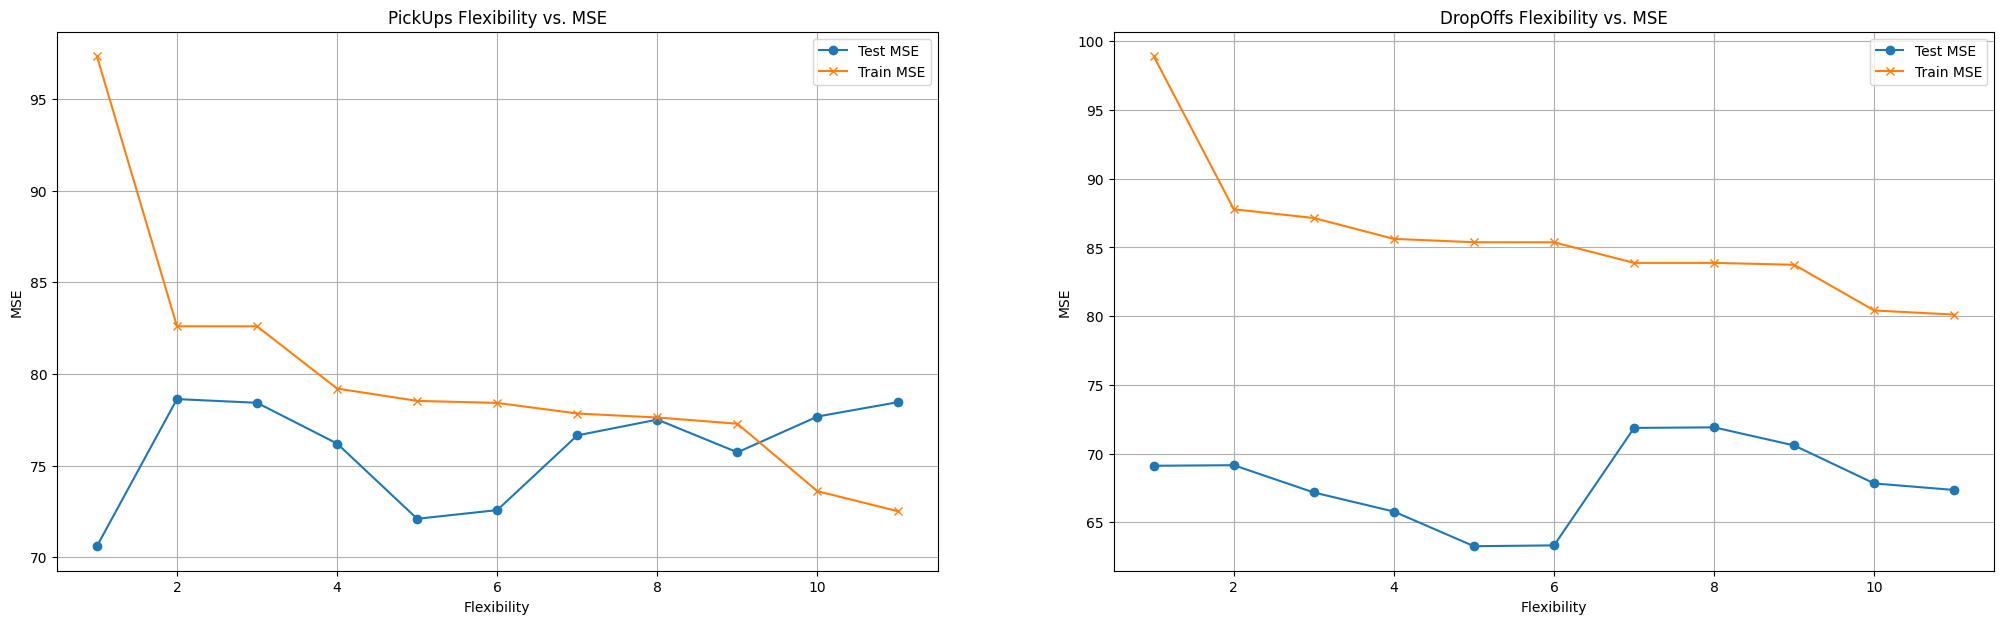

In [39]:
fig, (ax1, ax2) = plt.subplots(1,2, sharey = False, figsize = (25,7))

# Check for non-linear relationship picksup
if any(picksup_test_mse[i] != picksup_train_mse[i] for i in range(len(picksup_test_mse))):
    ax1.plot(picksup_flexibility, picksup_test_mse, label='Test MSE', marker='o')
    ax1.plot(picksup_flexibility, picksup_train_mse, label='Train MSE', marker='x')
else:
    ax1.plot(picksup_flexibility, picksup_test_mse, label='Test MSE', marker='o')
    ax1.plot(picksup_flexibility, picksup_train_mse, label='Train MSE', marker='x')

# Check for non-linear relationship dropoffs
if any(dropoffs_test_mse[i] != dropoffs_train_mse[i] for i in range(len(dropoffs_test_mse))):
    ax2.plot(dropoffs_flexibility, dropoffs_test_mse, label='Test MSE', marker='o' )
    ax2.plot(dropoffs_flexibility, dropoffs_train_mse, label='Train MSE', marker='x')
else:
    ax2.plot(dropoffs_flexibility, dropoffs_test_mse, label='Test MSE', marker='o')
    ax2.plot(dropoffs_flexibility, dropoffs_train_mse, label='Train MSE', marker='x')

ax1.grid(True)
ax1.set_xlabel('Flexibility')
ax1.set_ylabel('MSE')
ax1.set_title('PickUps Flexibility vs. MSE')
ax1.legend()

ax2.grid(True)
ax2.set_xlabel('Flexibility')
ax2.set_ylabel('MSE')
ax2.set_title('DropOffs Flexibility vs. MSE')
ax2.legend()
plt.show()

Detect non-additivity in features using residual plots

We create scatter plots of the residuals against each of the predictor variables, with the intent to find any patterns, curvature, or systematic deviations in the scatter plots. Observation of non-linear relationships or patterns in the residuals may indicate non-additivity in the features.

In [40]:
# pd of residuals and predictor variables.
picksUps_residualsframe = pd.concat([pd.Series(Pickups_Combined_Scoring['Testing_Residuals'][0]),Pickups_X_test], axis = 1);
dropOffs_residualsframe = pd.concat([pd.Series(DropOffs_Combined_Scoring['Testing_Residuals'][0]),Dropoffs_X_test], axis = 1)

Text(0.5, 0.98, 'Residuals vs Pickups Regression Features')

<Figure size 1300x1000 with 0 Axes>

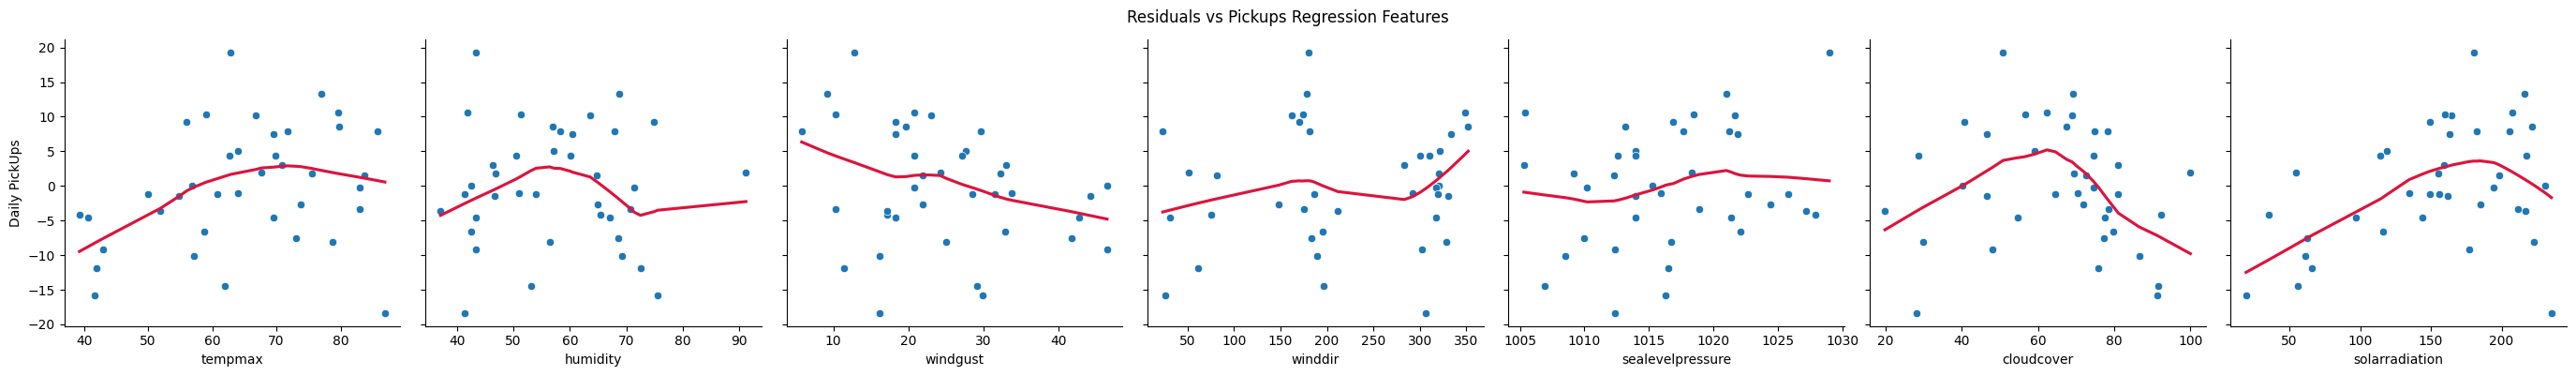

In [41]:
# Plot of residuals against each of the predictor variables
plt.figure(figsize = (13,10))
pair_picksUps = picksUps_residualsframe.select_dtypes('number')
pair_picksUps.rename(columns = {'pu_ct':'Daily PickUps'}, inplace = True)
pg = sn.pairplot(pair_picksUps, x_vars = ['tempmax', 'humidity', 'windgust', 'winddir','sealevelpressure', 'cloudcover', 'solarradiation'] , y_vars = 'Daily PickUps', height = 4)

def plot_extra(x, y, **kwargs):
     sn.regplot(data=kwargs['data'], x=x.name, y=y.name, lowess=True, scatter=False, color=kwargs['color'])

pg.map_offdiag(plot_extra, color = 'crimson', data = pair_picksUps)
pg.fig.subplots_adjust(top = 0.9)
pg.fig.suptitle("Residuals vs Pickups Regression Features")

Text(0.5, 0.98, 'Residuals vs DropOffs Regression Features')

<Figure size 1300x1000 with 0 Axes>

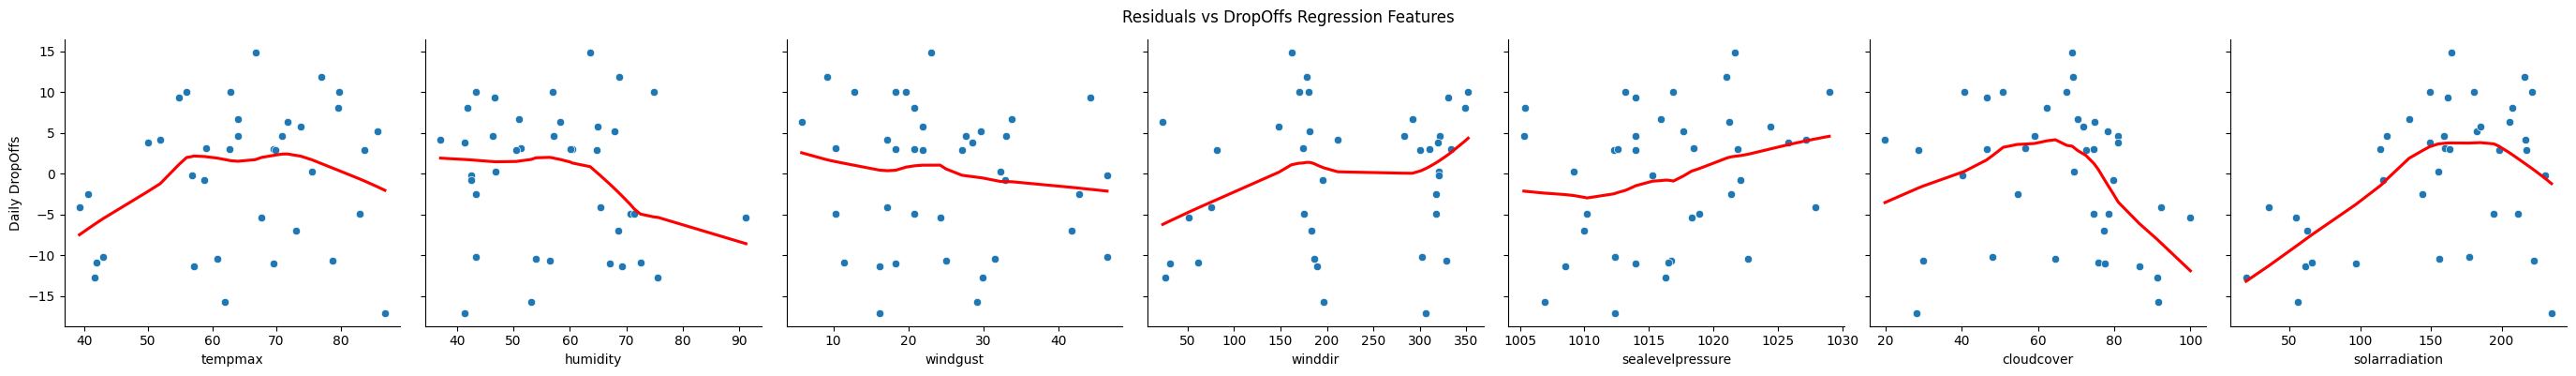

In [42]:
# Plot of residuals against each of the predictor variables
plt.figure(figsize = (13,10))
pair_dropoffs = dropOffs_residualsframe.select_dtypes('number')
pair_dropoffs.rename(columns = {'do_ct':'Daily DropOffs'}, inplace = True)
pg = sn.pairplot(pair_dropoffs, x_vars = ['tempmax', 'humidity', 'windgust', 'winddir','sealevelpressure', 'cloudcover', 'solarradiation'] , y_vars = 'Daily DropOffs', height = 4)

def plot_extra(x, y, **kwargs):
     sn.regplot(data=kwargs['data'], x=x.name, y=y.name, lowess=True, scatter=False, line_kws = {'color':'red'})

pg.map_offdiag(plot_extra, data = pair_dropoffs)
pg.fig.subplots_adjust(top = 0.9)
pg.fig.suptitle("Residuals vs DropOffs Regression Features")

Testing Interaction between TempMax and Humidity

We investigated the potential interaction between Tempmax and Humidity using a multi-step approach:

1 - We introduced a new discrete variable, Tempmax70, to categorize observations based on whether Tempmax was above or below 70°F.

2 - We segregated the dataset into two sets: one with Tempmax above 70°F and the other with Tempmax below 70°F.

3 - For the dataset with Tempmax above 70°F, we built a multi-linear regression model. In this model, the beta coefficient for Humidity was 0.2058.

4 - Next, we built a multi-linear regression model for the dataset with Tempmax below 70°F. In this model, the beta coefficient for Humidity was -0.1064.

5 - Finally, we noted the beta coefficient (-0.0804) for Humidity in a multi-linear regression model built on the entire dataset without any segregation.

The key observation is that the slope between Pickup Count and Humidity changes significantly when the outside temperature is below or above 70°F. This suggests a potential interaction between Tempmax and Humidity.

In [43]:
# add an indicator for tempmax >= 70
# converting a numeric variable to a binary indicator
df_m_pu['tempmax70'] = [1 if i >= 70 else 0 for i in df_m_pu['tempmax']]

In [44]:
df_m_pu_plus_70=df_m_pu[df_m_pu['tempmax70']==1]
df_m_pu_under_70=df_m_pu[df_m_pu['tempmax70']==0]

In [45]:
import statsmodels.formula.api as smf
pu_model_intTX70 = smf.ols('pu_ct ~ tempmax + tempmax70 + humidity + windgust + winddir + sealevelpressure + cloudcover + solarradiation + icon', data =df_m_pu_plus_70).fit()
pu_model_intTX70.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  pu_ct   R-squared:                       0.309
Model:                            OLS   Adj. R-squared:                  0.212
Method:                 Least Squares   F-statistic:                     3.187
Date:                Fri, 19 Sep 2025   Prob (F-statistic):            0.00304
Time:                        14:05:55   Log-Likelihood:                -260.51
No. Observations:                  74   AIC:                             541.0
Df Residuals:                      64   BIC:                             564.1
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                   -10.8602    130.401     -0.083      0.934    -271.366     249.646
icon[T.partly-cloudy-day]    -7.9881      6.514     -1.226      0.225     -21.001       5.025
icon[T.rain]                -19.9913      7.562     -2.644      0.010     -35.099      -4.884
tempmax                      -0.1401      0.238     -0.589      0.558      -0.615       0.335
tempmax70                   -10.8602    130.401     -0.083      0.934    -271.366     249.646
humidity                      0.1720      0.151      1.137      0.260      -0.130       0.474
windgust                      0.1944      0.140      1.389      0.170      -0.085       0.474
winddir                       0.0367      0.015      2.378      0.020       0.006       0.068
sealevelpressure              0.0460      0.251      0.183      0.855      -0.456       0.548
cloudcover                    0.0180      0.077      0.234      0.816      -0.136       0.172
solarradiation                0.0215      0.037      0.584      0.561      -0.052       0.095
==============================================================================
Omnibus:                        0.192   Durbin-Watson:                   1.173
Prob(Omnibus):                  0.909   Jarque-Bera (JB):                0.112
Skew:                           0.092   Prob(JB):                        0.946
Kurtosis:                       2.951   Cond. No.                     3.27e+18
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 7.64e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [46]:
pu_model_intTXu70 = smf.ols('pu_ct ~ tempmax + tempmax70 + humidity + windgust + winddir + sealevelpressure + cloudcover + solarradiation  + icon', data =df_m_pu_under_70).fit()
pu_model_intTXu70.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  pu_ct   R-squared:                       0.528
Model:                            OLS   Adj. R-squared:                  0.447
Method:                 Least Squares   F-statistic:                     6.506
Date:                Fri, 19 Sep 2025   Prob (F-statistic):           3.88e-07
Time:                        14:06:06   Log-Likelihood:                -256.32
No. Observations:                  76   AIC:                             536.6
Df Residuals:                      64   BIC:                             564.6
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                  -274.3313    162.300     -1.690      0.096    -598.562      49.899
icon[T.cloudy]               -7.2307      7.878     -0.918      0.362     -22.969       8.507
icon[T.partly-cloudy-day]    -6.8283      4.880     -1.399      0.167     -16.576       2.920
icon[T.rain]                 -8.1877      6.136     -1.334      0.187     -20.447       4.071
icon[T.snow]                 -7.1400     10.139     -0.704      0.484     -27.395      13.115
tempmax                       0.6770      0.122      5.555      0.000       0.434       0.920
tempmax70                  -2.15e-11   1.28e-11     -1.686      0.097    -4.7e-11    3.98e-12
humidity                     -0.0512      0.102     -0.502      0.617      -0.255       0.153
windgust                     -0.2210      0.110     -2.018      0.048      -0.440      -0.002
winddir                       0.0209      0.012      1.788      0.079      -0.002       0.044
sealevelpressure              0.2594      0.153      1.695      0.095      -0.046       0.565
cloudcover                    0.0518      0.077      0.676      0.502      -0.101       0.205
solarradiation                0.0232      0.030      0.779      0.439      -0.036       0.083
==============================================================================
Omnibus:                        0.278   Durbin-Watson:                   1.543
Prob(Omnibus):                  0.870   Jarque-Bera (JB):                0.462
Skew:                          -0.043   Prob(JB):                        0.794
Kurtosis:                       2.628   Cond. No.                     4.09e+19
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.04e-32. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

PU vs Tempmax * Humididty + Windgust + Winddir + Sealevelpressure + Cloudcover + SolarRadiation + Icon

Next, we constructed a multiple linear regression (MLR) model that incorporates the interaction between TempMax and Humidity. This allowed us to examine the additional flexibility introduced to the model and determine whether there was an increase in the test mean squared error (MSE) score. We expected the residual errors to increase and the Test MSE to rise.

In [47]:
import statsmodels.formula.api as smf
pu_model_mlr9 = smf.ols('pu_ct ~ tempmax * humidity + windgust + winddir + sealevelpressure + cloudcover + solarradiation + icon', data =df_m_pu).fit()

pu_model_mlr9.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  pu_ct   R-squared:                       0.348
Model:                            OLS   Adj. R-squared:                  0.291
Method:                 Least Squares   F-statistic:                     6.102
Date:                Fri, 19 Sep 2025   Prob (F-statistic):           1.68e-08
Time:                        14:06:42   Log-Likelihood:                -532.51
No. Observations:                 150   AIC:                             1091.
Df Residuals:                     137   BIC:                             1130.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                  -208.5801    147.380     -1.415      0.159    -500.014      82.854
icon[T.cloudy]              -12.7823      7.329     -1.744      0.083     -27.275       1.711
icon[T.partly-cloudy-day]    -6.9218      4.079     -1.697      0.092     -14.988       1.144
icon[T.rain]                -11.9289      4.849     -2.460      0.015     -21.517      -2.341
icon[T.snow]                -12.6745     10.430     -1.215      0.226     -33.299       7.950
tempmax                       0.6164      0.269      2.290      0.024       0.084       1.149
humidity                      0.2615      0.317      0.824      0.411      -0.366       0.889
tempmax:humidity             -0.0047      0.004     -1.062      0.290      -0.013       0.004
windgust                     -0.0734      0.090     -0.813      0.418      -0.252       0.105
winddir                       0.0264      0.009      2.890      0.004       0.008       0.044
sealevelpressure              0.1934      0.135      1.434      0.154      -0.073       0.460
cloudcover                    0.0623      0.056      1.110      0.269      -0.049       0.173
solarradiation                0.0043      0.023      0.181      0.857      -0.042       0.051
==============================================================================
Omnibus:                        1.054   Durbin-Watson:                   1.186
Prob(Omnibus):                  0.590   Jarque-Bera (JB):                1.014
Skew:                          -0.020   Prob(JB):                        0.602
Kurtosis:                       2.599   Cond. No.                     8.93e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.93e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [48]:
y = df_m_pu['pu_ct']

X_temp=df_m_pu.drop(columns=['tempmax70'])
X = X_temp.drop('pu_ct',axis=1)
X = pd.get_dummies(data=X, drop_first=True)
X.head()

,tempmax,humidity,windgust,winddir,sealevelpressure,cloudcover,solarradiation,icon_cloudy,icon_partly-cloudy-day,icon_rain,icon_snow
0,40.7,59.4,16.1,347.8,1025.5,81.8,130.3,False,False,False,True
1,41.8,59.2,12.8,199.9,1021.8,94.5,87.7,True,False,False,False
2,40.7,43.4,42.7,317.1,1021.4,54.6,143.9,False,True,False,False
3,31.9,37.9,30.6,221.9,1035.2,27.8,150.7,False,True,False,False
4,58.8,42.6,32.9,195.8,1022.1,79.7,116.1,False,True,False,False


In [49]:
X['tempmax * humidity']=np.array(X['tempmax'])*np.array(X['humidity']) # note the new column name 'gender_male' here.
X

,tempmax,humidity,windgust,winddir,sealevelpressure,cloudcover,solarradiation,icon_cloudy,icon_partly-cloudy-day,icon_rain,icon_snow,tempmax * humidity
0,40.7,59.4,16.1,347.8,1025.5,81.8,130.3,False,False,False,True,2417.58
1,41.8,59.2,12.8,199.9,1021.8,94.5,87.7,True,False,False,False,2474.56
2,40.7,43.4,42.7,317.1,1021.4,54.6,143.9,False,True,False,False,1766.38
3,31.9,37.9,30.6,221.9,1035.2,27.8,150.7,False,True,False,False,1209.01
4,58.8,42.6,32.9,195.8,1022.1,79.7,116.1,False,True,False,False,2504.88
...,...,...,...,...,...,...,...,...,...,...,...,...
145,87.9,70.0,23.0,186.4,1005.3,81.8,142.3,False,True,False,False,6153.00
146,84.0,75.1,33.6,203.9,1005.4,85.4,132.7,False,False,True,False,6308.40
147,81.9,64.8,26.8,303.4,1011.7,67.4,158.8,False,True,False,False,5307.12
148,86.8,58.3,6.9,313.0,1017.0,22.4,216.9,False,True,False,False,5060.44


In [50]:
X_train,X_test, y_train,y_test = train_test_split(X,y, test_size=0.75, random_state = 200)
X_train.columns
linear_regressor = LinearRegression()
linear_regressor.fit(X_train[['tempmax', 'humidity', 'windgust', 'winddir', 'sealevelpressure',
       'cloudcover', 'solarradiation', 'icon_cloudy',
       'icon_partly-cloudy-day', 'icon_rain', 'icon_snow',
       'tempmax * humidity']], y_train)

LinearRegression()

In [51]:
y_pred = linear_regressor.predict(X_train[['tempmax', 'humidity', 'windgust', 'winddir', 'sealevelpressure',
       'cloudcover', 'solarradiation', 'icon_cloudy',
       'icon_partly-cloudy-day', 'icon_rain', 'icon_snow',
       'tempmax * humidity']])
mse = round(mean_squared_error(y_train, y_pred),3)
print(f"MSE in training data is {mse}")

MSE in training data is 62.137


In [52]:
y_pred = linear_regressor.predict(X_test[['tempmax', 'humidity', 'windgust', 'winddir', 'sealevelpressure',
       'cloudcover', 'solarradiation', 'icon_cloudy',
       'icon_partly-cloudy-day', 'icon_rain', 'icon_snow',
       'tempmax * humidity']]) # use X_test
mse = round(mean_squared_error(y_test, y_pred),3) # use y_test
print(f"MSE in test data is {mse}")

MSE in test data is 139.457


Conclusion: The test mean squared error (MSE) has further deteriorated, increasing from 99.546 for the previous multiple linear regression (MLR) to 137.319 upon the introduction of the interaction term. This demonstrates that enhancing the flexibility of your model during training can lead to reduced accuracy in production.

DO vs Tempmax * Humididty + Windgust + Winddir + Sealevelpressure + Cloudcover + SolarRadiation + Moonphase + Icon

Lets look at the MLR without any interaction between Tempmax and Humidity

In [54]:
do_model_mlr = smf.ols('do_ct ~ tempmax + humidity + windgust + winddir + sealevelpressure + cloudcover + solarradiation + icon', data =df_m_do).fit()

do_model_mlr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  do_ct   R-squared:                       0.315
Model:                            OLS   Adj. R-squared:                  0.260
Method:                 Least Squares   F-statistic:                     5.756
Date:                Fri, 19 Sep 2025   Prob (F-statistic):           1.31e-07
Time:                        14:09:02   Log-Likelihood:                -536.81
No. Observations:                 150   AIC:                             1098.
Df Residuals:                     138   BIC:                             1134.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                  -115.6193    139.479     -0.829      0.409    -391.412     160.174
icon[T.cloudy]              -10.3936      7.511     -1.384      0.169     -25.244       4.457
icon[T.partly-cloudy-day]    -7.3036      4.162     -1.755      0.081     -15.533       0.925
icon[T.rain]                -12.3377      4.964     -2.486      0.014     -22.152      -2.523
icon[T.snow]                 -8.0407     10.645     -0.755      0.451     -29.088      13.007
tempmax                       0.3569      0.083      4.311      0.000       0.193       0.521
humidity                     -0.1005      0.090     -1.117      0.266      -0.278       0.077
windgust                     -0.0981      0.091     -1.082      0.281      -0.277       0.081
winddir                       0.0174      0.009      1.879      0.062      -0.001       0.036
sealevelpressure              0.1279      0.133      0.962      0.338      -0.135       0.391
cloudcover                    0.0545      0.057      0.955      0.341      -0.058       0.168
solarradiation               -0.0077      0.024     -0.327      0.744      -0.055       0.039
==============================================================================
Omnibus:                        0.622   Durbin-Watson:                   1.276
Prob(Omnibus):                  0.733   Jarque-Bera (JB):                0.723
Skew:                           0.011   Prob(JB):                        0.697
Kurtosis:                       2.661   Cond. No.                     1.99e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.99e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Interaction Testing

In [56]:
# add an indicator for tempmax >= 70
# converting a numeric variable to a binary indicator
df_m_do['tempmax70'] = [1 if i >= 70 else 0 for i in df_m_do['tempmax']]

df_m_do_plus_70=df_m_do[df_m_do['tempmax70']==1]
df_m_do_under_70=df_m_do[df_m_do['tempmax70']==0]

do_model_intTX70 = smf.ols('do_ct ~ tempmax + tempmax70 + humidity + windgust + winddir + sealevelpressure + cloudcover + solarradiation + icon', data =df_m_do_plus_70).fit()
do_model_intTX70.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  do_ct   R-squared:                       0.227
Model:                            OLS   Adj. R-squared:                  0.118
Method:                 Least Squares   F-statistic:                     2.087
Date:                Fri, 19 Sep 2025   Prob (F-statistic):             0.0436
Time:                        14:09:51   Log-Likelihood:                -265.28
No. Observations:                  74   AIC:                             550.6
Df Residuals:                      64   BIC:                             573.6
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                   -73.1291    139.082     -0.526      0.601    -350.978     204.719
icon[T.partly-cloudy-day]    -7.0594      6.948     -1.016      0.313     -20.939       6.820
icon[T.rain]                -16.9336      8.066     -2.099      0.040     -33.047      -0.820
tempmax                       0.0471      0.254      0.186      0.853      -0.460       0.554
tempmax70                   -73.1291    139.082     -0.526      0.601    -350.978     204.719
humidity                      0.0461      0.161      0.286      0.776      -0.276       0.368
windgust                      0.1590      0.149      1.065      0.291      -0.139       0.457
winddir                       0.0281      0.016      1.705      0.093      -0.005       0.061
sealevelpressure              0.1677      0.268      0.625      0.534      -0.368       0.703
cloudcover                    0.0185      0.082      0.225      0.823      -0.146       0.183
solarradiation               -0.0001      0.039     -0.003      0.997      -0.079       0.078
==============================================================================
Omnibus:                        0.474   Durbin-Watson:                   1.469
Prob(Omnibus):                  0.789   Jarque-Bera (JB):                0.218
Skew:                           0.129   Prob(JB):                        0.897
Kurtosis:                       3.065   Cond. No.                     3.27e+18
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 7.64e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [57]:
do_model_intTXu70 = smf.ols('do_ct ~ tempmax + tempmax70 + humidity + windgust + winddir + sealevelpressure + cloudcover + solarradiation + icon', data =df_m_do_under_70).fit()
do_model_intTXu70.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  do_ct   R-squared:                       0.449
Model:                            OLS   Adj. R-squared:                  0.354
Method:                 Least Squares   F-statistic:                     4.744
Date:                Fri, 19 Sep 2025   Prob (F-statistic):           2.75e-05
Time:                        14:10:04   Log-Likelihood:                -261.46
No. Observations:                  76   AIC:                             546.9
Df Residuals:                      64   BIC:                             574.9
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                  -142.8149    173.648     -0.822      0.414    -489.716     204.086
icon[T.cloudy]               -9.1282      8.429     -1.083      0.283     -25.967       7.710
icon[T.partly-cloudy-day]    -9.3271      5.221     -1.787      0.079     -19.757       1.102
icon[T.rain]                -12.3042      6.566     -1.874      0.065     -25.420       0.812
icon[T.snow]                 -6.9812     10.848     -0.644      0.522     -28.653      14.690
tempmax                       0.5977      0.130      4.584      0.000       0.337       0.858
tempmax70                 -1.115e-11   1.36e-11     -0.817      0.417   -3.84e-11    1.61e-11
humidity                     -0.0811      0.109     -0.743      0.460      -0.299       0.137
windgust                     -0.2305      0.117     -1.966      0.054      -0.465       0.004
winddir                       0.0139      0.012      1.111      0.271      -0.011       0.039
sealevelpressure              0.1418      0.164      0.866      0.390      -0.185       0.469
cloudcover                    0.0685      0.082      0.836      0.406      -0.095       0.232
solarradiation                0.0165      0.032      0.519      0.606      -0.047       0.080
==============================================================================
Omnibus:                        1.786   Durbin-Watson:                   1.324
Prob(Omnibus):                  0.409   Jarque-Bera (JB):                1.689
Skew:                          -0.355   Prob(JB):                        0.430
Kurtosis:                       2.831   Cond. No.                     4.09e+19
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.04e-32. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [58]:
do_model_mlr_int = smf.ols('do_ct ~ tempmax * humidity + windgust + winddir + sealevelpressure + cloudcover + solarradiation + icon', data =df_m_do).fit()

do_model_mlr_int.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  do_ct   R-squared:                       0.320
Model:                            OLS   Adj. R-squared:                  0.260
Method:                 Least Squares   F-statistic:                     5.366
Date:                Fri, 19 Sep 2025   Prob (F-statistic):           2.11e-07
Time:                        14:10:19   Log-Likelihood:                -536.24
No. Observations:                 150   AIC:                             1098.
Df Residuals:                     137   BIC:                             1138.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                  -175.1777    151.087     -1.159      0.248    -473.942     123.586
icon[T.cloudy]              -10.6493      7.513     -1.417      0.159     -25.507       4.208
icon[T.partly-cloudy-day]    -7.7279      4.182     -1.848      0.067     -15.997       0.541
icon[T.rain]                -12.6292      4.971     -2.541      0.012     -22.459      -2.800
icon[T.snow]                 -9.0917     10.692     -0.850      0.397     -30.234      12.051
tempmax                       0.6265      0.276      2.271      0.025       0.081       1.172
humidity                      0.2199      0.325      0.676      0.500      -0.424       0.863
tempmax:humidity             -0.0046      0.005     -1.024      0.307      -0.014       0.004
windgust                     -0.0782      0.093     -0.844      0.400      -0.261       0.105
winddir                       0.0187      0.009      1.996      0.048       0.000       0.037
sealevelpressure              0.1668      0.138      1.206      0.230      -0.107       0.440
cloudcover                    0.0617      0.058      1.072      0.286      -0.052       0.175
solarradiation               -0.0031      0.024     -0.128      0.899      -0.051       0.045
==============================================================================
Omnibus:                        0.584   Durbin-Watson:                   1.305
Prob(Omnibus):                  0.747   Jarque-Bera (JB):                0.697
Skew:                           0.023   Prob(JB):                        0.706
Kurtosis:                       2.669   Cond. No.                     8.93e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.93e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [60]:
y = df_m_do['do_ct']

X_temp=df_m_do.drop(columns=['tempmax70'])
X = X_temp.drop('do_ct',axis=1)
X = pd.get_dummies(data=X, drop_first=True)
X.head()

X['tempmax * humidity']=np.array(X['tempmax'])*np.array(X['humidity'])

X_train,X_test, y_train,y_test = train_test_split(X,y, test_size=0.75, random_state = 200)

X_train.columns

linear_regressor = LinearRegression()
linear_regressor.fit(X_train[['tempmax', 'humidity', 'windgust', 'winddir', 'sealevelpressure',
       'cloudcover', 'solarradiation', 'icon_cloudy',
       'icon_partly-cloudy-day', 'icon_rain', 'icon_snow',
       'tempmax * humidity']], y_train)

LinearRegression()

In [62]:
y_pred = linear_regressor.predict(X_train[['tempmax', 'humidity', 'windgust', 'winddir', 'sealevelpressure',
       'cloudcover', 'solarradiation','icon_cloudy',
       'icon_partly-cloudy-day', 'icon_rain', 'icon_snow',
       'tempmax * humidity']])
mse = round(mean_squared_error(y_train, y_pred),3)
print(f"MSE in training data is {mse}")

MSE in training data is 62.388


In [63]:
y_pred = linear_regressor.predict(X_test[['tempmax', 'humidity', 'windgust', 'winddir', 'sealevelpressure',
       'cloudcover', 'solarradiation', 'icon_cloudy',
       'icon_partly-cloudy-day', 'icon_rain', 'icon_snow',
       'tempmax * humidity']]) # use X_test
mse = round(mean_squared_error(y_test, y_pred),3) # use y_test
print(f"MSE in test data is {mse}")

MSE in test data is 122.106


3. Based on the observations in 2), determine the best linear regression models for predicting pu_ct and do_ct, respectively.

The best linear regression model for predicting pu_ct is the one built with the following independent variables: 'tempmax', 'humidity', 'windgust', 'winddir', 'sealevelpressure'. Although this model has the second lowest test MSE score, we chose to proceed with this model instead of the model with the lowest test MSE score, because the model with the lowest test MSE score only has one variable, while our chosen model has more features. We believe a 5-feature model would provide a better prediction for pu_ct than a 1-feature model, as it may lead to bias in predicting.

We also have chosen the same 5-feature model to predict do_ct, because it has the lowest test MSE with a reasonable number of features: 'tempmax', 'humidity', 'windgust', 'winddir', 'sealevelpressure'.

4. Imaging that we are showcasing the prediction models to the operaEons managers of Capital Bikeshare. Illustrate the computation of the predicted pu_ct and do_ct using the chosen models, e.g., demonstration using the first instance in the test data (X_test.iloc[0,:]).

In [64]:
# 75% train data
# PickUps
Pickups_X_train,Pickups_X_test, Pickups_y_train,Pickups_y_test = train_test_split(X_PickUps,y_PickUps, test_size = 0.25, random_state = 200)

# 75% train data
# DropOffs
Dropoffs_X_train,Dropoffs_X_test, Dropoffs_y_train,Dropoffs_y_test = train_test_split(X_DropOffs,y_DropOffs, test_size = 0.25, random_state = 200)

In [65]:
linear_regressor = LinearRegression()
linear_regressor.fit(Pickups_X_train[['tempmax', 'humidity','windgust', 'winddir','sealevelpressure']], Pickups_y_train)

LinearRegression()

In [66]:
print(pd.Series(linear_regressor.coef_.flatten(), index=Pickups_X_train[['tempmax','humidity','windgust','winddir', 'sealevelpressure']].columns))

tempmax             0.363294
humidity           -0.188258
windgust           -0.065114
winddir             0.024406
sealevelpressure    0.134231
dtype: float64


In [67]:
# The coefficients
print("Intercept: \n", linear_regressor.intercept_)
# The coefficients
print("Coefficients: \n", linear_regressor.coef_)

Intercept: 
 -126.96016757232547
Coefficients: 
 [ 0.36329365 -0.18825829 -0.06511415  0.02440597  0.13423068]


In [68]:
Pickups_X_test.iloc[0,:] #the first instance in the test data

tempmax                     66.7
humidity                    63.6
windgust                    23.0
winddir                    161.7
sealevelpressure          1021.7
cloudcover                  69.0
solarradiation             164.6
icon_cloudy                False
icon_partly-cloudy-day     False
icon_rain                   True
icon_snow                  False
Name: 84, dtype: object

In [69]:
0.363294*66.7 - 0.188258*63.6 - 0.065114 * 23 + 0.024406 * 161.7 + 0.134231 * 1021.7 - 126.96

24.891141899999994

In [70]:
linear_regressor = LinearRegression()
linear_regressor.fit(Dropoffs_X_train[['tempmax', 'humidity','windgust', 'winddir','sealevelpressure']], Dropoffs_y_train)

LinearRegression()

In [71]:
print(pd.Series(linear_regressor.coef_.flatten(), index=Dropoffs_X_train[['tempmax','humidity','windgust','winddir','sealevelpressure']].columns))

tempmax             0.343879
humidity           -0.183844
windgust           -0.126690
winddir             0.016114
sealevelpressure    0.080520
dtype: float64


In [72]:
# The coefficients
print("Intercept: \n", linear_regressor.intercept_)
# The coefficients
print("Coefficients: \n", linear_regressor.coef_)

Intercept: 
 -66.77696425898904
Coefficients: 
 [ 0.34387915 -0.18384418 -0.12668986  0.0161136   0.08051989]


In [73]:
Dropoffs_X_test.iloc[0,:] #the first instance in the test data

tempmax                     66.7
humidity                    63.6
windgust                    23.0
winddir                    161.7
sealevelpressure          1021.7
cloudcover                  69.0
solarradiation             164.6
icon_cloudy                False
icon_partly-cloudy-day     False
icon_rain                   True
icon_snow                  False
Name: 84, dtype: object

Predicted do_ct:

In [74]:
0.3439*66.7 - 0.1838*63.6 - 0.1267 * 23 + 0.01611 * 161.7 + 0.0805 * 1021.7 - 66.78

26.406187000000003

<b>5. Using the predicted pu_ct and do_ct for X_test.iloc[0,:] as an example, discuss the optimal number of bikes and docks to allocate for the station at GWSB.</b>

Using the predicted results, there's a higher probability for drop off than pick up on average. Thus, we can use the rate to calculate the no of bikes and no of docks: 8 bikes for pick ups, 9 available docks for drop off. It's evident that there is a greater need of returning the bikes than taking it from this station specifically. The station location is near an university campus, thus, it may serve as an additional choice of transportation, other than metro or car.

Noted that we should be aware while these results only retain for this problem with this set of data used to train the model. If we adjust the test_train_split percentage, the results may adjust accordingly. However, we chose to use 75:25 train:test as it is determined to provide a reasonable prediction, as well as this ratio is popular in the public.

Furthermore, to optimize the bikes and docks at GWSB Capital Bikeshare station, the company can use the following Linear Programs

<b>Capital Bikeshare optimization</b>

<b>Alternative - 1</b>

In this linear program, we are adopting a revenue-based approach. The goal is to penalize the company for failing to meet pickup or drop-off demands. For each instance of a pickup shortfall, we charge 10 dollar and for each drop-off shortfall, we charge 8 dollar. The company's objective is to minimize these penalty charges.

$$
Z^* = \min \; \Big[ (26 - x_1 - \min(x_2,22)) \cdot 10 \;+\; (22 - x_2 - \min(x_1,26)) \cdot 8 \Big] \\
\text{s.t. } \quad x_1 + x_2 \leq 17 \\
\quad x_1 \geq 0, \; x_2 \geq 0
$$

Assumption: Throughout the day, docking bikes will help meet some of the pickup demand. Similarly, pickups will free up docking slots, aiding in fulfilling the demand for drop-offs. Therefore, in the objective function, we have used:

the min() function between the running total for drop-offs and the 'drop-off demand'. the min() function between the running total for pickups and the 'pickup demand'.

<b>Alternative - 2</b>

In this approach, we are assessing the service quality at the GWSB Capital Bikeshare station by comparing the number of bikes/docks available at the start of the day to the Pickup and DropOff demands.

Let:

x1 be the optimum number of bikes delivered by Capital Bikeshare at the start of the day. x2 be the optimum number of docks available at the GWSB station at the start of the day.

The service quality for pickups at GWSB is represented by

x1/26

and for drop-offs, it is represented by x2/22

We want to ensure that the difference in service quality does not exceed a certain threshold. If the difference exceeds 0.20, it suggests that Capital Bikeshare may be prioritizing one service over the other, which could negatively impact customer satisfaction. To address this, we have introduced a constraint.



$$
Z^* = \max \; \Big[ \tfrac{x_1}{26} + \tfrac{x_2}{22} \Big] \cdot \tfrac{1}{2} \\
\text{s.t. } \quad \tfrac{x_1}{26} - \tfrac{x_2}{20} \leq 0.20 \\
\quad x_1 \geq 0, \; x_2 \geq 0
$$

In [75]:
from sklearn.preprocessing import scale 
from sklearn import model_selection
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error

# 75% train data
FeaturesX = pd.get_dummies(data=Features, drop_first=True)
y = FeaturesX[['pu_ct','do_ct']]
X = FeaturesX.drop(columns = ['pu_ct','do_ct'])

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25, random_state = 200)

<b>Linear Regression</b>

In [76]:
# Fit Linear regression for pickups
pickups_linear = LinearRegression()
pickups_linear.fit(scale(X_train), y_train.iloc[:,0])
pickups_linear.score(scale(X_test), y_test.iloc[:,0])
# print(pd.Series(pickups_linear.coef_.flatten(), index = X_train.columns))

styles = [dict(selector = 'caption', props = [('font-size', "120%"), ('font-weight', 'bold'), ('text-align','left')])]

d = {'Parameter':X_train.columns,'Coefficients':pickups_linear.coef_.flatten()}
picks_printframe = pd.DataFrame(d)

# Fit Linear regression for dropoffs
dropoff_linear = LinearRegression()
dropoff_linear.fit(scale(X_train), y_train.iloc[:,1])
dropoff_linear.score(scale(X_test), y_test.iloc[:,1])
# # print(pd.Series(dropoff_linear.coef_.flatten(), index = X_train.columns))
d = {'Parameter':X_train.columns,'Coefficients':dropoff_linear.coef_.flatten()}
drops_printframe = pd.DataFrame(d)

In [77]:
picks_printframe.style.set_caption('PickUps').hide(axis = "index").format(precision = 2).set_table_styles(styles)

Parameter,Coefficients
tempmax,-2.97
humidity,-0.87
windgust,0.01
winddir,-2.83
sealevelpressure,-2.27
cloudcover,-0.10
solarradiation,1.56
icon_cloudy,0.03
icon_partly-cloudy-day,-0.89
icon_rain,-1.17


In [78]:
drops_printframe.style.set_caption('DropOffs').hide(axis = "index").format(precision = 2).set_table_styles(styles)

Parameter,Coefficients
tempmax,-3.48
humidity,-0.09
windgust,0.15
winddir,-3.02
sealevelpressure,-2.53
cloudcover,0.20
solarradiation,2.68
icon_cloudy,-0.68
icon_partly-cloudy-day,-1.17
icon_rain,-2.46


In [79]:
#  Cross-validation
K = 5
pickups_scores = cross_val_score(pickups_linear, X_train, y_train.iloc[:,0], cv = K, scoring = 'r2')
dropoffs_scores = cross_val_score(dropoff_linear, X_train, y_train.iloc[:,1], cv = K, scoring = 'r2')
print('Score in each fold:', pickups_scores)
print("%0.2f accuracy with a standard deviation of %0.2f" % (pickups_scores.mean(), pickups_scores.std()))
print('Score in each fold:', dropoffs_scores)
print("%0.2f accuracy with a standard deviation of %0.2f" % (dropoffs_scores.mean(), dropoffs_scores.std()))

Score in each fold: [-0.56434745 -0.02172064 -0.24125562 -0.02277713 -0.25043048]
-0.22 accuracy with a standard deviation of 0.20
Score in each fold: [-0.63114009 -0.029749   -0.23736977 -0.16266873 -0.41301073]
-0.29 accuracy with a standard deviation of 0.21


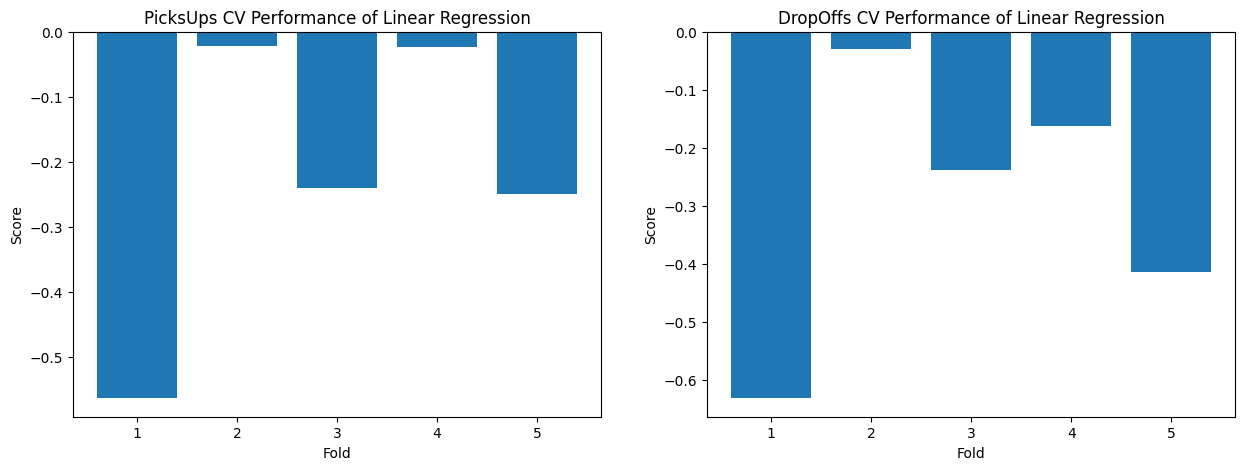

In [80]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (15, 5))

ax1.bar(np.arange(1,K+1),pickups_scores)
ax1.set_xlabel('Fold')
ax1.set_ylabel('Score')
ax1.set_title('PicksUps CV Performance of Linear Regression')

ax2.bar(np.arange(1,K+1),dropoffs_scores)
ax2.set_xlabel('Fold')
ax2.set_ylabel('Score')
ax2.set_title('DropOffs CV Performance of Linear Regression')
plt.show()

<b>Linear Regression Predictions</b>

In [81]:
# Daily PickUps and DropOffs Predictions
df1 = pickups_linear.predict(scale(X_test))
df2 = dropoff_linear.predict(scale(X_test))

ALPHA = 7
BETA = 2

d = {'Y_test_PickUps': y_test['pu_ct'], 'Y_test_DropOffs': y_test['do_ct'], 'Linear_PickUps_Pred': pickups_linear.predict(scale(X_test)), 'Linear_DropOffs_Pred': dropoff_linear.predict(scale(X_test))}
Linear_Regression = pd.DataFrame(data = d )

In [82]:
from itertools import combinations, chain
docks = list(np.arange(0,18))

def findpairs(lst,K):
    return [i for i in combinations(lst,2) if sum(i) == K]

docks = findpairs(docks,17)
docks.extend([item[::-1] for item in docks][::-1])

In [83]:
def predicted_penalty_cost(column):
    globalize = [[(ALPHA*max(0, column['Linear_PickUps_Pred'] - i[0]) + BETA*max(0, column['Linear_DropOffs_Pred'] - i[1])), str(i)] for i in docks]
    min_summa = min([val[0] for val in globalize])
    index = [i[1] for i in globalize if i[0] == min([val[0] for val in globalize])]
    return min_summa, index

Linear_Regression['Predicted_Penalty_Cost'] = Linear_Regression.apply(predicted_penalty_cost, axis = 1)
Linear_Regression['Predicted_Penalty'], Linear_Regression['BizDecision'] = zip(*Linear_Regression.Predicted_Penalty_Cost)
Linear_Regression['BizDecision'] = Linear_Regression['BizDecision'].str[0]
Linear_Regression['BizDecision'] = Linear_Regression['BizDecision'].map(lambda x: x.lstrip('(').rstrip(')'))
Linear_Regression[['Bz_Bike','Bz_Dock']] = Linear_Regression['BizDecision'].str.split(', ', expand = True)
Linear_Regression.drop(columns = ['Predicted_Penalty_Cost','BizDecision'], inplace = True)

def actual_penalty_cost(column):
    globalize = [[(ALPHA*max(0, column['Y_test_PickUps'] - i[0]) + BETA*max(0, column['Y_test_DropOffs'] - i[1])), str(i)] for i in docks]
    min_summa = min([val[0] for val in globalize])
    index = [i[1] for i in globalize if i[0] == min([val[0] for val in globalize])]
    return min_summa, index

Linear_Regression['Actual_Penalty_Cost'] = Linear_Regression.apply(actual_penalty_cost, axis = 1)
Linear_Regression['Actual_Penalty'], Linear_Regression['BizDecision'] = zip(*Linear_Regression.Actual_Penalty_Cost)
Linear_Regression.drop(columns = ['Actual_Penalty_Cost','BizDecision'], inplace = True)

Linear_ModelSummary = {'Business Decision - Least Penalty - Bz_Bike': Linear_Regression['Bz_Bike'], 'Business Decision - Least Penalty - Bz_Dock': Linear_Regression['Bz_Dock'], 
'Actual Bikes deployed (Y-Test)': Linear_Regression['Y_test_PickUps'], 'Actual Docks deployed (Y-Test)': Linear_Regression['Y_test_DropOffs'], 
'Actual_Penalty_Cost':Linear_Regression['Actual_Penalty'], 'Predicted_Penalty_Cost_Optimal':Linear_Regression['Predicted_Penalty']}
Linear_ModelSummary = pd.DataFrame(data = Linear_ModelSummary)
Linear_ModelSummary['Actual Penalty Cost > Least Predicted Penalty Cost? (0,1)'] = Linear_ModelSummary.apply(lambda row: 1 if row.Actual_Penalty_Cost > row.Predicted_Penalty_Cost_Optimal else 0, axis = 1) 
Linear_ModelSummary.head()

,Business Decision - Least Penalty - Bz_Bike,Business Decision - Least Penalty - Bz_Dock,Actual Bikes deployed (Y-Test),Actual Docks deployed (Y-Test),Actual_Penalty_Cost,Predicted_Penalty_Cost_Optimal,"Actual Penalty Cost > Least Predicted Penalty Cost? (0,1)"
84,17,0,36,42,217,117.633646,1
122,17,0,32,35,175,136.593987,1
28,17,0,32,34,173,103.435695,1
24,17,0,14,15,24,153.403032,0
75,17,0,30,33,157,136.131773,1


In [84]:
len(Linear_ModelSummary[Linear_ModelSummary['Actual Penalty Cost > Least Predicted Penalty Cost? (0,1)'] == 1])/len(Linear_ModelSummary)

0.47368421052631576

<b>Ridge Rgression</b>

In [85]:
# Fit Linear regression pickups
model = LinearRegression()
model.fit(scale(X_train),y_train.iloc[:,0])
alphas = 10**np.linspace(-2,5,100)
ridge = Ridge()
pickups_coefs = []

for a in alphas:
    ridge.set_params(alpha=a)
    ridge.fit(scale(X_train), y_train.iloc[:,0])
    pickups_coefs.append(ridge.coef_)


# Fit Linear regression  dropoffs
model = LinearRegression()
model.fit(scale(X_train),y_train.iloc[:,1])
alphas = 10**np.linspace(-2,5,100)
ridge = Ridge()
dropoffs_coefs = []

for a in alphas:
    ridge.set_params(alpha=a)
    ridge.fit(scale(X_train), y_train.iloc[:,1])
    dropoffs_coefs.append(ridge.coef_)

Text(0.5, 1.0, 'DropOffs Ridge coefficients as a function of the regularization')

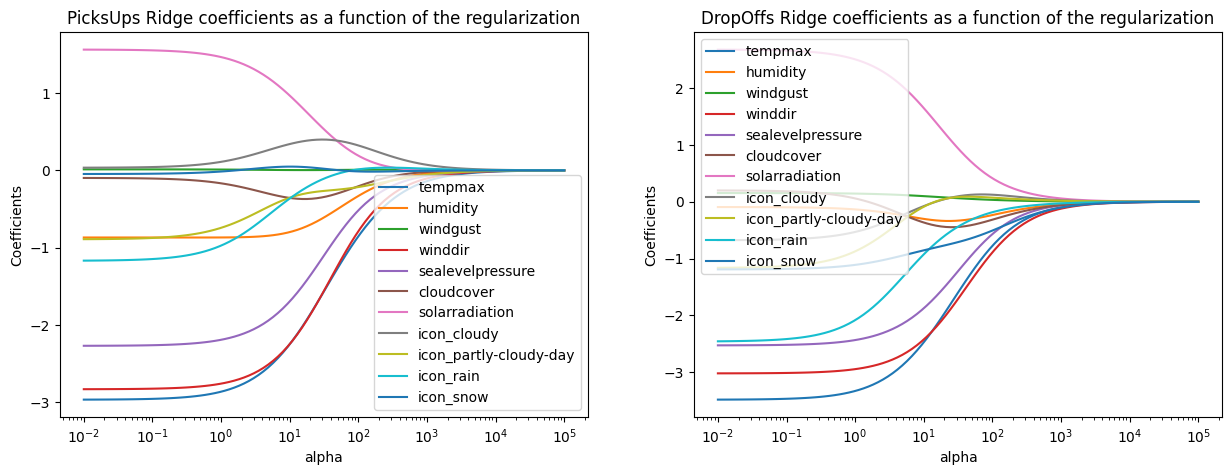

In [86]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (15, 5))

ax1.plot(alphas, pickups_coefs)
ax2.plot(alphas, dropoffs_coefs)
ax1.set_xscale('log')
ax1.set_xlim(ax1.get_xlim()) 
ax1.axis('tight')
ax1.set_xlabel('alpha')
ax1.set_ylabel('Coefficients')
ax1.legend(list(X_train.columns), loc='best')
ax1.set_title('PicksUps Ridge coefficients as a function of the regularization')

ax2.set_xscale('log')
ax2.set_xlim(ax2.get_xlim()) 
ax2.axis('tight')
ax2.set_xlabel('alpha')
ax2.set_ylabel('Coefficients')
ax2.legend(list(X_train.columns), loc='best')
ax2.set_title('DropOffs Ridge coefficients as a function of the regularization')

In [87]:
# find the best alpha via CV with selected scoring metric
pickup_ridgecv = RidgeCV(alphas = alphas, scoring = 'neg_mean_squared_error')
pickup_ridgecv.fit(scale(X_train), y_train.iloc[:,0])

print("The best alpha from PicksUps RidgeCV:", pickup_ridgecv.alpha_)

dropoffs_ridgecv = RidgeCV(alphas = alphas, scoring = 'neg_mean_squared_error')
dropoffs_ridgecv.fit(scale(X_train), y_train.iloc[:,1])

print("The best alpha from DropOffs RidgeCV:", dropoffs_ridgecv.alpha_)

The best alpha from PicksUps RidgeCV: 100000.0
The best alpha from DropOffs RidgeCV: 100000.0


In [88]:
# with the best pickups alpha
pickups_ridge = Ridge()
pickups_ridge.set_params(alpha = pickup_ridgecv.alpha_)
pickups_ridge.fit(scale(X_train), y_train.iloc[:,0])

# with the best dropoffs alpha
dropoffs_ridge = Ridge()
dropoffs_ridge.set_params(alpha =   dropoffs_ridgecv.alpha_)
dropoffs_ridge.fit(scale(X_train), y_train.iloc[:,1])

Ridge(alpha=100000.0)

<b>Ridge Regression Predictions</b>

In [89]:
# Daily PickUps and DropOffs Predictions
df1 = pickups_ridge.predict(scale(X_test))
df2 = dropoffs_ridge.predict(scale(X_test))

d = {'Y_test_PickUps': y_test['pu_ct'], 'Y_test_DropOffs': y_test['do_ct'], 'Ridge_PickUps_Pred': pickups_ridge.predict(scale(X_test)), 'Ridge_DropOffs_Pred': dropoffs_ridge.predict(scale(X_test))}
Ridge_Regression = pd.DataFrame(data = d )
Ridge_Regression.head()

,Y_test_PickUps,Y_test_DropOffs,Ridge_PickUps_Pred,Ridge_DropOffs_Pred
84,36,42,26.524463,27.956221
122,32,35,26.529161,27.954011
28,32,34,26.528780,27.953431
24,14,15,26.530982,27.954900
75,30,33,26.529447,27.954551


In [90]:
def predicted_penalty_cost(column):
    globalize = [[(ALPHA*max(0, column['Ridge_PickUps_Pred'] - i[0]) + BETA*max(0, column['Ridge_DropOffs_Pred'] - i[1])), str(i)] for i in docks]
    min_summa = min([val[0] for val in globalize])
    index = [i[1] for i in globalize if i[0] == min([val[0] for val in globalize])]
    return min_summa, index

Ridge_Regression['Predicted_Penalty_Cost'] = Ridge_Regression.apply(predicted_penalty_cost, axis = 1)
Ridge_Regression['Predicted_Penalty'], Ridge_Regression['BizDecision'] = zip(*Ridge_Regression.Predicted_Penalty_Cost)
Ridge_Regression['BizDecision'] = Ridge_Regression['BizDecision'].str[0]
Ridge_Regression['BizDecision'] = Ridge_Regression['BizDecision'].map(lambda x: x.lstrip('(').rstrip(')'))
Ridge_Regression[['Bz_Bike','Bz_Dock']] = Ridge_Regression['BizDecision'].str.split(', ', expand = True)
Ridge_Regression.drop(columns = ['Predicted_Penalty_Cost','BizDecision'], inplace = True)
Ridge_Regression.head()

,Y_test_PickUps,Y_test_DropOffs,Ridge_PickUps_Pred,Ridge_DropOffs_Pred,Predicted_Penalty,Bz_Bike,Bz_Dock
84,36,42,26.524463,27.956221,122.583683,17,0
122,32,35,26.529161,27.954011,122.612152,17,0
28,32,34,26.528780,27.953431,122.608323,17,0
24,14,15,26.530982,27.954900,122.626675,17,0
75,30,33,26.529447,27.954551,122.615232,17,0


In [91]:
def actual_penalty_cost(column):
    globalize = [[(ALPHA*max(0, column['Y_test_PickUps'] - i[0]) + BETA*max(0, column['Y_test_DropOffs'] - i[1])), str(i)] for i in docks]
    min_summa = min([val[0] for val in globalize])
    index = [i[1] for i in globalize if i[0] == min([val[0] for val in globalize])]
    return min_summa, index

Ridge_Regression['Actual_Penalty_Cost'] = Ridge_Regression.apply(actual_penalty_cost, axis = 1)
Ridge_Regression['Actual_Penalty'], Ridge_Regression['BizDecision'] = zip(*Ridge_Regression.Actual_Penalty_Cost)
Ridge_Regression.drop(columns = ['Actual_Penalty_Cost','BizDecision'], inplace = True)

In [92]:
Ridge_ModelSummary = {'Business Decision - Least Penalty - Bz_Bike': Ridge_Regression['Bz_Bike'], 'Business Decision - Least Penalty - Bz_Dock': Ridge_Regression['Bz_Dock'], 
'Actual Bikes deployed (Y-Test)': Ridge_Regression['Y_test_PickUps'], 'Actual Docks deployed (Y-Test)': Ridge_Regression['Y_test_DropOffs'], 
'Actual_Penalty_Cost':Ridge_Regression['Actual_Penalty'], 'Predicted_Penalty_Cost_Optimal':Ridge_Regression['Predicted_Penalty']}
Ridge_ModelSummary = pd.DataFrame(data = Ridge_ModelSummary)
Ridge_ModelSummary['Actual Penalty Cost > Least Predicted Penalty Cost? (0,1)'] = Ridge_ModelSummary.apply(lambda row: 1 if row.Actual_Penalty_Cost > row.Predicted_Penalty_Cost_Optimal else 0, axis = 1) 
Ridge_ModelSummary.head()

,Business Decision - Least Penalty - Bz_Bike,Business Decision - Least Penalty - Bz_Dock,Actual Bikes deployed (Y-Test),Actual Docks deployed (Y-Test),Actual_Penalty_Cost,Predicted_Penalty_Cost_Optimal,"Actual Penalty Cost > Least Predicted Penalty Cost? (0,1)"
84,17,0,36,42,217,122.583683,1
122,17,0,32,35,175,122.612152,1
28,17,0,32,34,173,122.608323,1
24,17,0,14,15,24,122.626675,0
75,17,0,30,33,157,122.615232,1


In [93]:
len(Ridge_ModelSummary[Ridge_ModelSummary['Actual Penalty Cost > Least Predicted Penalty Cost? (0,1)'] == 1])/len(Ridge_ModelSummary)

0.5

<b>Lasso Regression</b>

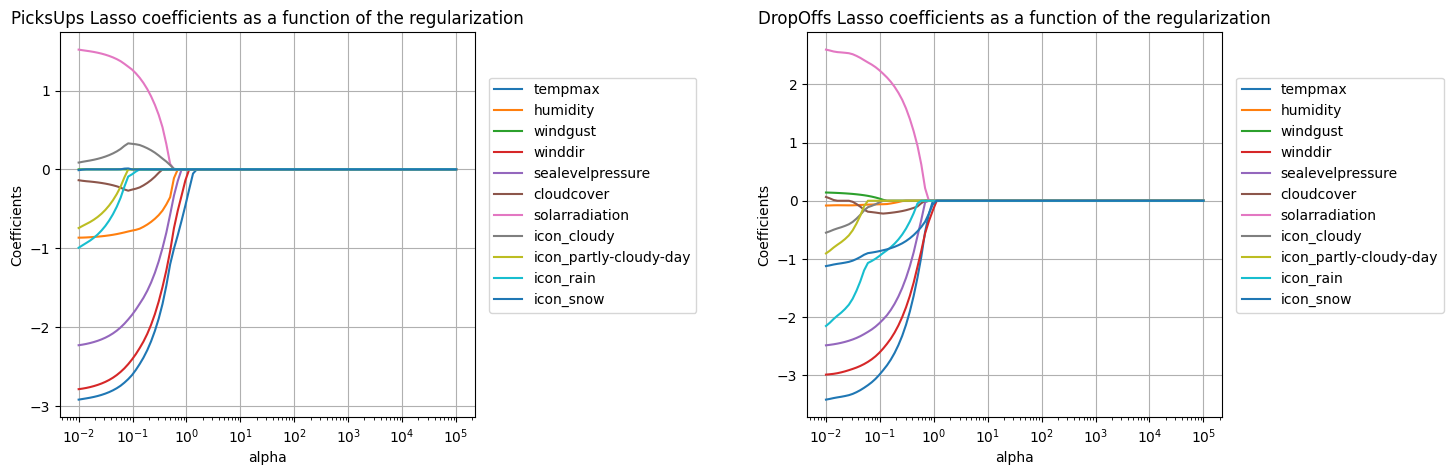

In [94]:
alphas = 10**np.linspace(-2,5,100)
lasso = Lasso()
pickups_coefs = []

for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(scale(X_train), y_train.iloc[:,0])
    pickups_coefs.append(lasso.coef_)

alphas = 10**np.linspace(-2,5,100)
lasso = Lasso()
dropoffs_coefs = []

for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(scale(X_train), y_train.iloc[:,1])
    dropoffs_coefs.append(lasso.coef_)


fig, (ax1, ax2) = plt.subplots(1,2, figsize = (15, 5))

ax1.plot(alphas, pickups_coefs)
ax2.plot(alphas, dropoffs_coefs)
ax1.set_xscale('log')
ax1.set_xlim(ax1.get_xlim()) 
ax1.axis('tight')
ax1.set_xlabel('alpha')
ax1.set_ylabel('Coefficients')
ax1.set_title('PicksUps Lasso coefficients as a function of the regularization')
ax1.legend(list(X_train.columns), loc=1, bbox_to_anchor = (1.55, 0.9))
ax1.grid(visible = True)

ax2.set_xscale('log')
ax2.set_xlim(ax2.get_xlim()) 
ax2.axis('tight')
ax2.set_xlabel('alpha')
ax2.set_ylabel('Coefficients')
ax2.legend(list(X_train.columns), loc=1, bbox_to_anchor = (1.55, 0.9))
ax2.set_title('DropOffs Lasso coefficients as a function of the regularization')
ax2.grid(visible = True)

plt.subplots_adjust(wspace = 0.8)
plt.show()

In [95]:
pickups_lasso = Lasso()
dropoffs_lasso = Lasso()

# find the best alpha via CV with selected scoring metric
pickup_lassocv = LassoCV(alphas = alphas)
pickup_lassocv.fit(scale(X_train),  y_train.iloc[:,0])
print('The best alpha from PicksUps LassoCV:', pickup_lassocv.alpha_)

dropoffs_lassocv = LassoCV(alphas = alphas)
dropoffs_lassocv.fit(scale(X_train),  y_train.iloc[:,1])
print('The best alpha from DropOffs LassoCV:', dropoffs_lassocv.alpha_)

The best alpha from PicksUps LassoCV: 100000.0
The best alpha from DropOffs LassoCV: 100000.0


In [96]:
# with the best pickups alpha
pickups_lasso.set_params(alpha=pickup_lassocv.alpha_)
pickups_lasso.fit(scale(X_train), y_train.iloc[:,0])
# print(pd.Series(pickups_lasso.coef_.flatten(), index=X_train.columns))

# with the best dropoffs alpha
dropoffs_lasso.set_params(alpha=dropoffs_lassocv.alpha_)
dropoffs_lasso.fit(scale(X_train), y_train.iloc[:,1])

Lasso(alpha=100000.0)

<b>Visualize the MSE path from Cross-Validation</b>

Text(0.5, 1.0, 'DropOffs Cross-Validation MSE')

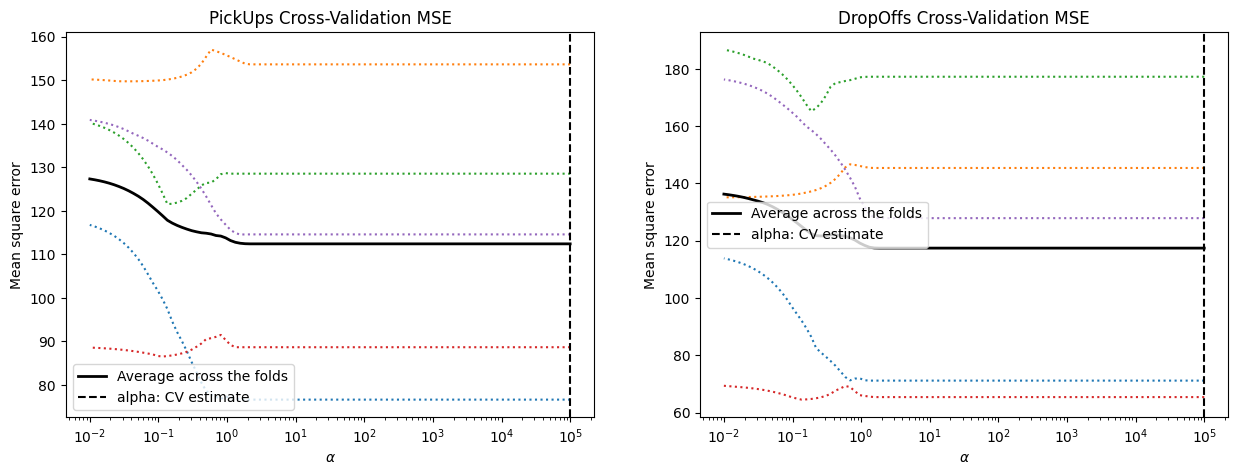

In [97]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (15, 5))

ax1.semilogx(pickup_lassocv.alphas_, pickup_lassocv.mse_path_, linestyle=":")
ax2.semilogx(dropoffs_lassocv.alphas_, dropoffs_lassocv.mse_path_, linestyle=":")
ax1.plot(
    pickup_lassocv.alphas_,
    pickup_lassocv.mse_path_.mean(axis=-1),
    color="black",
    label="Average across the folds",
    linewidth=2,
)

ax1.axvline(pickup_lassocv.alpha_, linestyle="--", color="black", label="alpha: CV estimate")
ax1.axis('tight')
ax1.set_xlabel(r"$\alpha$")
ax1.set_ylabel("Mean square error")
ax1.set_title('PicksUps Lasso coefficients as a function of the regularization')
ax1.legend()
ax1.set_title("PickUps Cross-Validation MSE")


ax2.plot(
    dropoffs_lassocv.alphas_,
    dropoffs_lassocv.mse_path_.mean(axis=-1),
    color="black",
    label="Average across the folds",
    linewidth=2,
)
ax2.axvline(dropoffs_lassocv.alpha_, linestyle="--", color="black", label="alpha: CV estimate")
ax2.axis('tight')
ax2.set_xlabel(r"$\alpha$")
ax2.set_ylabel("Mean square error")
ax2.legend()
ax2.set_title("DropOffs Cross-Validation MSE")

<b>Lasso Regression Predictions</b>

In [98]:
# Daily PickUps and DropOffs Predictions
df1 = pickups_lasso.predict(scale(X_test))
df2 = dropoffs_lasso.predict(scale(X_test))

d = {'Lasso_PickUps_Pred': pickups_lasso.predict(scale(X_test)), 'Lasso_DropOffs_Pred': dropoffs_lasso.predict(scale(X_test))}
Lasso_Regression = pd.DataFrame(data = d, index = Ridge_ModelSummary.index)

ModelSummary = Ridge_ModelSummary.loc[:,['Actual Bikes deployed (Y-Test)','Actual Docks deployed (Y-Test)','Actual_Penalty_Cost']]
Lasso_Regression = pd.merge(ModelSummary,Lasso_Regression, left_index = True, right_index = True)
Lasso_Regression.head()

,Actual Bikes deployed (Y-Test),Actual Docks deployed (Y-Test),Actual_Penalty_Cost,Lasso_PickUps_Pred,Lasso_DropOffs_Pred
84,36,42,217,26.526786,27.955357
122,32,35,175,26.526786,27.955357
28,32,34,173,26.526786,27.955357
24,14,15,24,26.526786,27.955357
75,30,33,157,26.526786,27.955357


In [99]:
def predicted_penalty_cost(column):
    globalize = [[(ALPHA*max(0, column['Lasso_PickUps_Pred'] - i[0]) + BETA*max(0, column['Lasso_DropOffs_Pred'] - i[1])), str(i)] for i in docks]
    min_summa = min([val[0] for val in globalize])
    index = [i[1] for i in globalize if i[0] == min([val[0] for val in globalize])]
    return min_summa, index

Lasso_Regression['Predicted_Penalty_Cost'] = Lasso_Regression.apply(predicted_penalty_cost, axis = 1)
Lasso_Regression['Predicted_Penalty'], Lasso_Regression['BizDecision'] = zip(*Lasso_Regression.Predicted_Penalty_Cost)
Lasso_Regression['BizDecision'] = Lasso_Regression['BizDecision'].str[0]
Lasso_Regression['BizDecision'] = Lasso_Regression['BizDecision'].map(lambda x: x.lstrip('(').rstrip(')'))
Lasso_Regression[['Bz_Bike','Bz_Dock']] = Lasso_Regression['BizDecision'].str.split(', ', expand = True)
Lasso_Regression.drop(columns = ['Predicted_Penalty_Cost','BizDecision'], inplace = True)
Lasso_Regression['Actual Penalty Cost > Least Predicted Penalty Cost? (0,1)'] = Lasso_Regression.apply(lambda row: 1 if row.Actual_Penalty_Cost > row.Predicted_Penalty else 0, axis = 1) 
Lasso_ModelSummary = {'Business Decision - Least Penalty - Bz_Bike': Lasso_Regression['Bz_Bike'], 'Business Decision - Least Penalty - Bz_Dock': Lasso_Regression['Bz_Dock'], 
'Actual Bikes deployed (Y-Test)': Ridge_Regression['Y_test_PickUps'], 'Actual Docks deployed (Y-Test)': Ridge_Regression['Y_test_DropOffs'], 
'Actual_Penalty_Cost':Lasso_Regression['Actual_Penalty_Cost'], 'Predicted_Penalty_Cost_Optimal':Lasso_Regression['Predicted_Penalty'],
'Actual Penalty Cost > Least Predicted Penalty Cost? (0,1)':Lasso_Regression['Actual Penalty Cost > Least Predicted Penalty Cost? (0,1)']}
Lasso_ModelSummary = pd.DataFrame(data = Lasso_ModelSummary)
Lasso_ModelSummary.head()

,Business Decision - Least Penalty - Bz_Bike,Business Decision - Least Penalty - Bz_Dock,Actual Bikes deployed (Y-Test),Actual Docks deployed (Y-Test),Actual_Penalty_Cost,Predicted_Penalty_Cost_Optimal,"Actual Penalty Cost > Least Predicted Penalty Cost? (0,1)"
84,17,0,36,42,217,122.598214,1
122,17,0,32,35,175,122.598214,1
28,17,0,32,34,173,122.598214,1
24,17,0,14,15,24,122.598214,0
75,17,0,30,33,157,122.598214,1


In [100]:
len(Lasso_ModelSummary[Lasso_ModelSummary['Actual Penalty Cost > Least Predicted Penalty Cost? (0,1)'] == 1])/len(Lasso_ModelSummary)

0.5

<b>Elastic Net Regression</b>

In [101]:
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import ElasticNetCV

ENcv = ElasticNetCV(alphas=None, cv=10, max_iter=10000) # default l1_ratio=0.5
picksUps_ENcv = ENcv.fit(scale(X_train), y_train.iloc[:,0])
print('The best alpha from PickUps ElasticNetCV:', picksUps_ENcv.alpha_)

ENcv = ElasticNetCV(alphas=None, cv=10, max_iter=10000) # default l1_ratio=0.5
dropOffs_ENcv = ENcv.fit(scale(X_train), y_train.iloc[:,1])
print('The best alpha from DropOffs ElasticNetCV:', dropOffs_ENcv.alpha_)

The best alpha from PickUps ElasticNetCV: 2.7502236389127144
The best alpha from DropOffs ElasticNetCV: 2.261491714317182


In [102]:
# with the best alpha
pickUps_ENet = ElasticNet(alpha = picksUps_ENcv.alpha_)
dropOffs_ENet = ElasticNet(alpha = dropOffs_ENcv.alpha_)

pickUps_ENet.fit(scale(X_train), y_train.iloc[:,0])
dropOffs_ENet.fit(scale(X_train), y_train.iloc[:,1])

ElasticNet(alpha=2.261491714317182)

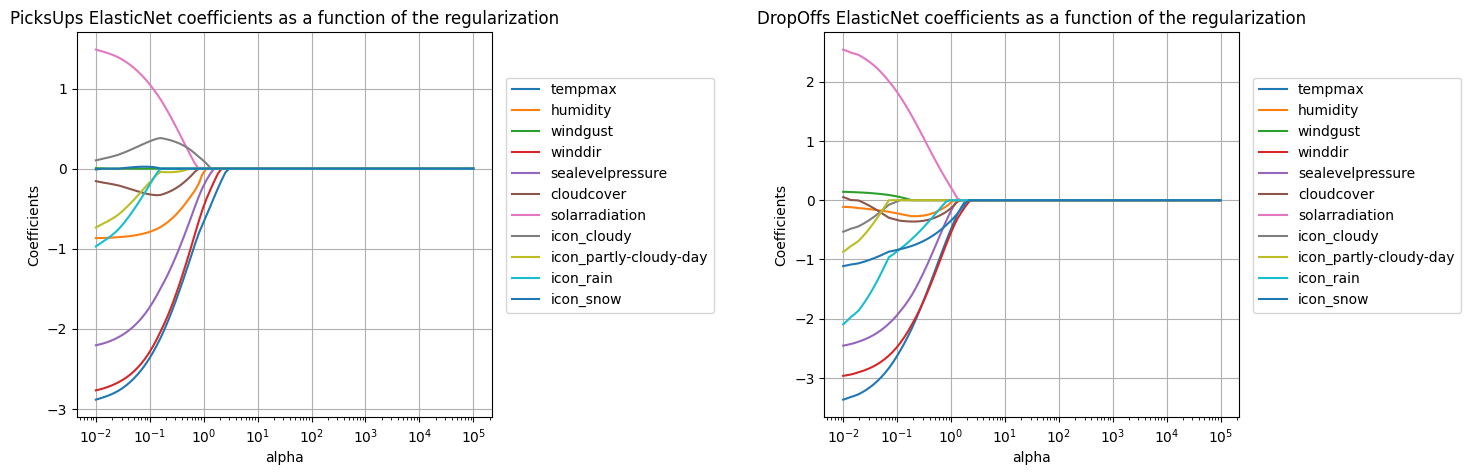

In [103]:
alphas = 10**np.linspace(-2,5,100)
ENet = ElasticNet()
dropoffs_coefs = []
pickups_coefs = []

for a in alphas:
    ENet.set_params(alpha= a)
    ENet.fit(scale(X_train), y_train.iloc[:,1])
    dropoffs_coefs.append(ENet.coef_)

for a in alphas:
    ENet.set_params(alpha= a)
    ENet.fit(scale(X_train), y_train.iloc[:,0])
    pickups_coefs.append(ENet.coef_)


fig, (ax1, ax2) = plt.subplots(1,2, figsize = (15, 5))

ax1.plot(alphas, pickups_coefs)
ax2.plot(alphas, dropoffs_coefs)
ax1.set_xscale('log')
ax1.set_xlim(ax1.get_xlim()) 
ax1.axis('tight')
ax1.set_xlabel('alpha')
ax1.set_ylabel('Coefficients')
ax1.set_title('PicksUps ElasticNet coefficients as a function of the regularization')
ax1.legend(list(X_train.columns), loc=1, bbox_to_anchor = (1.55, 0.9))
ax1.grid(visible = True)

ax2.set_xscale('log')
ax2.set_xlim(ax2.get_xlim()) 
ax2.axis('tight')
ax2.set_xlabel('alpha')
ax2.set_ylabel('Coefficients')
ax2.legend(list(X_train.columns), loc=1, bbox_to_anchor = (1.55, 0.9))
ax2.set_title('DropOffs ElasticNet coefficients as a function of the regularization')
ax2.grid(visible = True)

plt.subplots_adjust(wspace = 0.8)
plt.show()

<b>ElasticNet Regression Predictions</b>

In [104]:
# Daily PickUps and DropOffs Predictions
df1 = pickUps_ENet.predict(scale(X_test))
df2 = dropOffs_ENet.predict(scale(X_test))

d = {'ElasticNet_PickUps_Pred': pickUps_ENet.predict(scale(X_test)), 'ElasticNet_DropOffs_Pred': dropOffs_ENet.predict(scale(X_test))}
ElasticNet_Regression = pd.DataFrame(data = d, index = Ridge_ModelSummary.index)

ElasticNet_Regression = pd.merge(ModelSummary,ElasticNet_Regression, left_index = True, right_index = True)

In [105]:
def predicted_penalty_cost(column):
    globalize = [[(ALPHA*max(0, column['ElasticNet_PickUps_Pred'] - i[0]) + BETA*max(0, column['ElasticNet_DropOffs_Pred'] - i[1])), str(i)] for i in docks]
    min_summa = min([val[0] for val in globalize])
    index = [i[1] for i in globalize if i[0] == min([val[0] for val in globalize])]
    return min_summa, index

ElasticNet_Regression['Predicted_Penalty_Cost'] = ElasticNet_Regression.apply(predicted_penalty_cost, axis = 1)
ElasticNet_Regression['Predicted_Penalty'], ElasticNet_Regression['BizDecision'] = zip(*ElasticNet_Regression.Predicted_Penalty_Cost)
ElasticNet_Regression['BizDecision'] = ElasticNet_Regression['BizDecision'].str[0]
ElasticNet_Regression['BizDecision'] = ElasticNet_Regression['BizDecision'].map(lambda x: x.lstrip('(').rstrip(')'))
ElasticNet_Regression[['Bz_Bike','Bz_Dock']] = ElasticNet_Regression['BizDecision'].str.split(', ', expand = True)
ElasticNet_Regression.drop(columns = ['Predicted_Penalty_Cost','BizDecision'], inplace = True)
ElasticNet_Regression['Actual Penalty Cost > Least Predicted Penalty Cost? (0,1)'] = ElasticNet_Regression.apply(lambda row: 1 if row.Actual_Penalty_Cost > row.Predicted_Penalty else 0, axis = 1)
ElasticNet_ModelSummary = {'Business Decision - Least Penalty - Bz_Bike': ElasticNet_Regression['Bz_Bike'], 'Business Decision - Least Penalty - Bz_Dock': ElasticNet_Regression['Bz_Dock'], 
'Actual Bikes deployed (Y-Test)': Ridge_Regression['Y_test_PickUps'], 'Actual Docks deployed (Y-Test)': Ridge_Regression['Y_test_DropOffs'], 
'Actual_Penalty_Cost':ElasticNet_Regression['Actual_Penalty_Cost'], 'Predicted_Penalty_Cost_Optimal':ElasticNet_Regression['Predicted_Penalty'],
'Actual Penalty Cost > Least Predicted Penalty Cost? (0,1)':ElasticNet_Regression['Actual Penalty Cost > Least Predicted Penalty Cost? (0,1)']}
ElasticNet_ModelSummary = pd.DataFrame(data = ElasticNet_ModelSummary)
ElasticNet_ModelSummary.head()

ElasticNet_ModelSummary.head()

,Business Decision - Least Penalty - Bz_Bike,Business Decision - Least Penalty - Bz_Dock,Actual Bikes deployed (Y-Test),Actual Docks deployed (Y-Test),Actual_Penalty_Cost,Predicted_Penalty_Cost_Optimal,"Actual Penalty Cost > Least Predicted Penalty Cost? (0,1)"
84,17,0,36,42,217,122.598214,1
122,17,0,32,35,175,122.598214,1
28,17,0,32,34,173,122.598214,1
24,17,0,14,15,24,122.598214,0
75,17,0,30,33,157,122.598214,1


In [106]:
len(ElasticNet_ModelSummary[ElasticNet_ModelSummary['Actual Penalty Cost > Least Predicted Penalty Cost? (0,1)'] == 1])/len(ElasticNet_ModelSummary)

0.5

<b>KNN Regression</b>

In [107]:
from sklearn import neighbors

K = 10
pickup_mse_train = [-1]*30
pickup_mse_test = [-1]*30
dropoffs_mse_train = [-1]*30
dropoffs_mse_test = [-1]*30
for K in range(30):
    pmodel = neighbors.KNeighborsRegressor(n_neighbors = K+1)
    dmodel = neighbors.KNeighborsRegressor(n_neighbors = K+1)
    pmodel.fit(X_train, y_train.iloc[:,0])  #fit the model
    dmodel.fit(X_train, y_train.iloc[:,1])  #fit the model
    pickup_mse_train[K] = mean_squared_error( y_train.iloc[:,0], pmodel.predict(X_train))
    pickup_mse_test[K] = mean_squared_error( y_test.iloc[:,0], pmodel.predict(X_test))
    dropoffs_mse_train[K] = mean_squared_error( y_train.iloc[:,1], dmodel.predict(X_train))
    dropoffs_mse_test[K] = mean_squared_error( y_test.iloc[:,1], dmodel.predict(X_test))

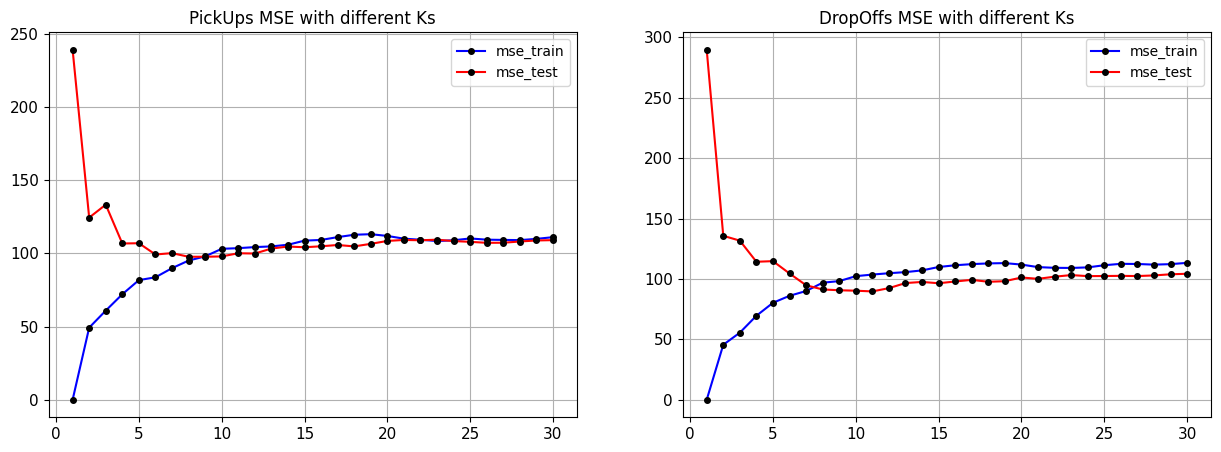

In [108]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (15, 5))

ax1.plot(np.arange(30)+1, pickup_mse_train,  color = 'blue', marker = '.', markersize = 8, markeredgecolor = 'black', markerfacecolor = 'black',label = 'mse_train')
ax1.plot(np.arange(30)+1, pickup_mse_test,  color = 'red',marker = '.', markersize = 8, markeredgecolor = 'black', markerfacecolor = 'black', label = 'mse_test')
ax1.legend(fontsize=10)
ax1.set_title('PickUps MSE with different Ks', fontsize=12)
ax1.tick_params(labelsize=11)
ax1.grid(visible = True)

ax2.plot(np.arange(30)+1, dropoffs_mse_train,  color = 'blue', marker = '.', markersize = 8, markeredgecolor = 'black', markerfacecolor = 'black',label = 'mse_train')
ax2.plot(np.arange(30)+1, dropoffs_mse_test,  color = 'red',marker = '.', markersize = 8, markeredgecolor = 'black', markerfacecolor = 'black', label = 'mse_test')
ax2.legend(fontsize=10)
ax2.set_title('DropOffs MSE with different Ks', fontsize=12)
ax2.tick_params(labelsize=11)
ax2.grid(visible = True)

plt.show()

<b>Select Optimal K</b>

In [109]:
# optimal k
print("The optimal K for pickups is: ", np.argmin(pickup_mse_test)+1)

# optimal k
print("The optimal K for dropoffs is: ", np.argmin(dropoffs_mse_test)+1)

The optimal K for pickups is:  8
The optimal K for dropoffs is:  11


In [110]:
# with the best K
pickups_KNN = neighbors.KNeighborsRegressor(n_neighbors = 19)
pickups_KNN.fit(scale(X_train), y_train.iloc[:,0])

dropoffs_KNN = neighbors.KNeighborsRegressor(n_neighbors = 23)
dropoffs_KNN.fit(scale(X_train), y_train.iloc[:,1])

KNeighborsRegressor(n_neighbors=23)

<b>KNN Regression Predictions</b>

In [111]:
# Daily PickUps and DropOffs Predictions
df1 = pickups_KNN.predict(scale(X_test))
df2 = dropoffs_KNN.predict(scale(X_test))

d = {'KNN_PickUps_Pred': pickups_KNN.predict(scale(X_test)), 'KNN_DropOffs_Pred': dropoffs_KNN.predict(scale(X_test))}
KNN_Regression = pd.DataFrame(data = d, index = Ridge_ModelSummary.index)

ModelSummary = Ridge_ModelSummary.loc[:,['Actual Bikes deployed (Y-Test)','Actual Docks deployed (Y-Test)','Actual_Penalty_Cost']]
KNN_Regression = pd.merge(ModelSummary,KNN_Regression, left_index = True, right_index = True)
KNN_Regression.head()

,Actual Bikes deployed (Y-Test),Actual Docks deployed (Y-Test),Actual_Penalty_Cost,KNN_PickUps_Pred,KNN_DropOffs_Pred
84,36,42,217,22.894737,26.304348
122,32,35,175,30.052632,28.130435
28,32,34,173,27.578947,28.565217
24,14,15,24,27.736842,28.782609
75,30,33,157,29.368421,28.826087


In [112]:
def predicted_penalty_cost(column):
    globalize = [[(ALPHA*max(0, column['KNN_PickUps_Pred'] - i[0]) + BETA*max(0, column['KNN_DropOffs_Pred'] - i[1])), str(i)] for i in docks]
    min_summa = min([val[0] for val in globalize])
    index = [i[1] for i in globalize if i[0] == min([val[0] for val in globalize])]
    return min_summa, index

KNN_Regression['Predicted_Penalty_Cost'] = KNN_Regression.apply(predicted_penalty_cost, axis = 1)
KNN_Regression['Predicted_Penalty'], KNN_Regression['BizDecision'] = zip(*KNN_Regression.Predicted_Penalty_Cost)
KNN_Regression['BizDecision'] = KNN_Regression['BizDecision'].str[0]
KNN_Regression['BizDecision'] = KNN_Regression['BizDecision'].map(lambda x: x.lstrip('(').rstrip(')'))
KNN_Regression[['Bz_Bike','Bz_Dock']] = KNN_Regression['BizDecision'].str.split(', ', expand = True)
KNN_Regression.drop(columns = ['Predicted_Penalty_Cost','BizDecision'], inplace = True)
KNN_Regression['Actual Penalty Cost > Least Predicted Penalty Cost? (0,1)'] = KNN_Regression.apply(lambda row: 1 if row.Actual_Penalty_Cost > row.Predicted_Penalty else 0, axis = 1)

KNN_ModelSummary = {'Business Decision - Least Penalty - Bz_Bike': KNN_Regression['Bz_Bike'], 'Business Decision - Least Penalty - Bz_Dock': KNN_Regression['Bz_Dock'], 
'Actual Bikes deployed (Y-Test)': Ridge_Regression['Y_test_PickUps'], 'Actual Docks deployed (Y-Test)': Ridge_Regression['Y_test_DropOffs'], 
'Actual_Penalty_Cost':ElasticNet_Regression['Actual_Penalty_Cost'], 'Predicted_Penalty_Cost_Optimal':KNN_Regression['Predicted_Penalty'],
'Actual Penalty Cost > Least Predicted Penalty Cost? (0,1)':KNN_Regression['Actual Penalty Cost > Least Predicted Penalty Cost? (0,1)']}
KNN_ModelSummary = pd.DataFrame(data = KNN_ModelSummary)
KNN_ModelSummary.head()

,Business Decision - Least Penalty - Bz_Bike,Business Decision - Least Penalty - Bz_Dock,Actual Bikes deployed (Y-Test),Actual Docks deployed (Y-Test),Actual_Penalty_Cost,Predicted_Penalty_Cost_Optimal,"Actual Penalty Cost > Least Predicted Penalty Cost? (0,1)"
84,17,0,36,42,217,93.871854,1
122,17,0,32,35,175,147.629291,1
28,17,0,32,34,173,131.183066,1
24,17,0,14,15,24,132.723112,0
75,17,0,30,33,157,144.231121,1


In [113]:
len(KNN_ModelSummary[KNN_ModelSummary['Actual Penalty Cost > Least Predicted Penalty Cost? (0,1)'] == 1])/len(KNN_ModelSummary)

0.5526315789473685

<b>Performance Evaluation Cross Validation</b>

Score in each fold: [-0.23444185 -0.02166461 -0.06711508  0.00909566 -0.2170096 ]
-0.11 accuracy with a standard deviation of 0.10
Score in each fold: [-0.10736015 -0.00999454 -0.00470907  0.07974868 -0.15532944]
-0.04 accuracy with a standard deviation of 0.08
Score in each fold: [-0.11478609 -0.01288591 -0.00375106  0.0761298  -0.16222147]
-0.04 accuracy with a standard deviation of 0.08
Score in each fold: [-0.05188558 -0.1457693  -0.13684873 -0.04584621 -0.07060479]
-0.09 accuracy with a standard deviation of 0.04


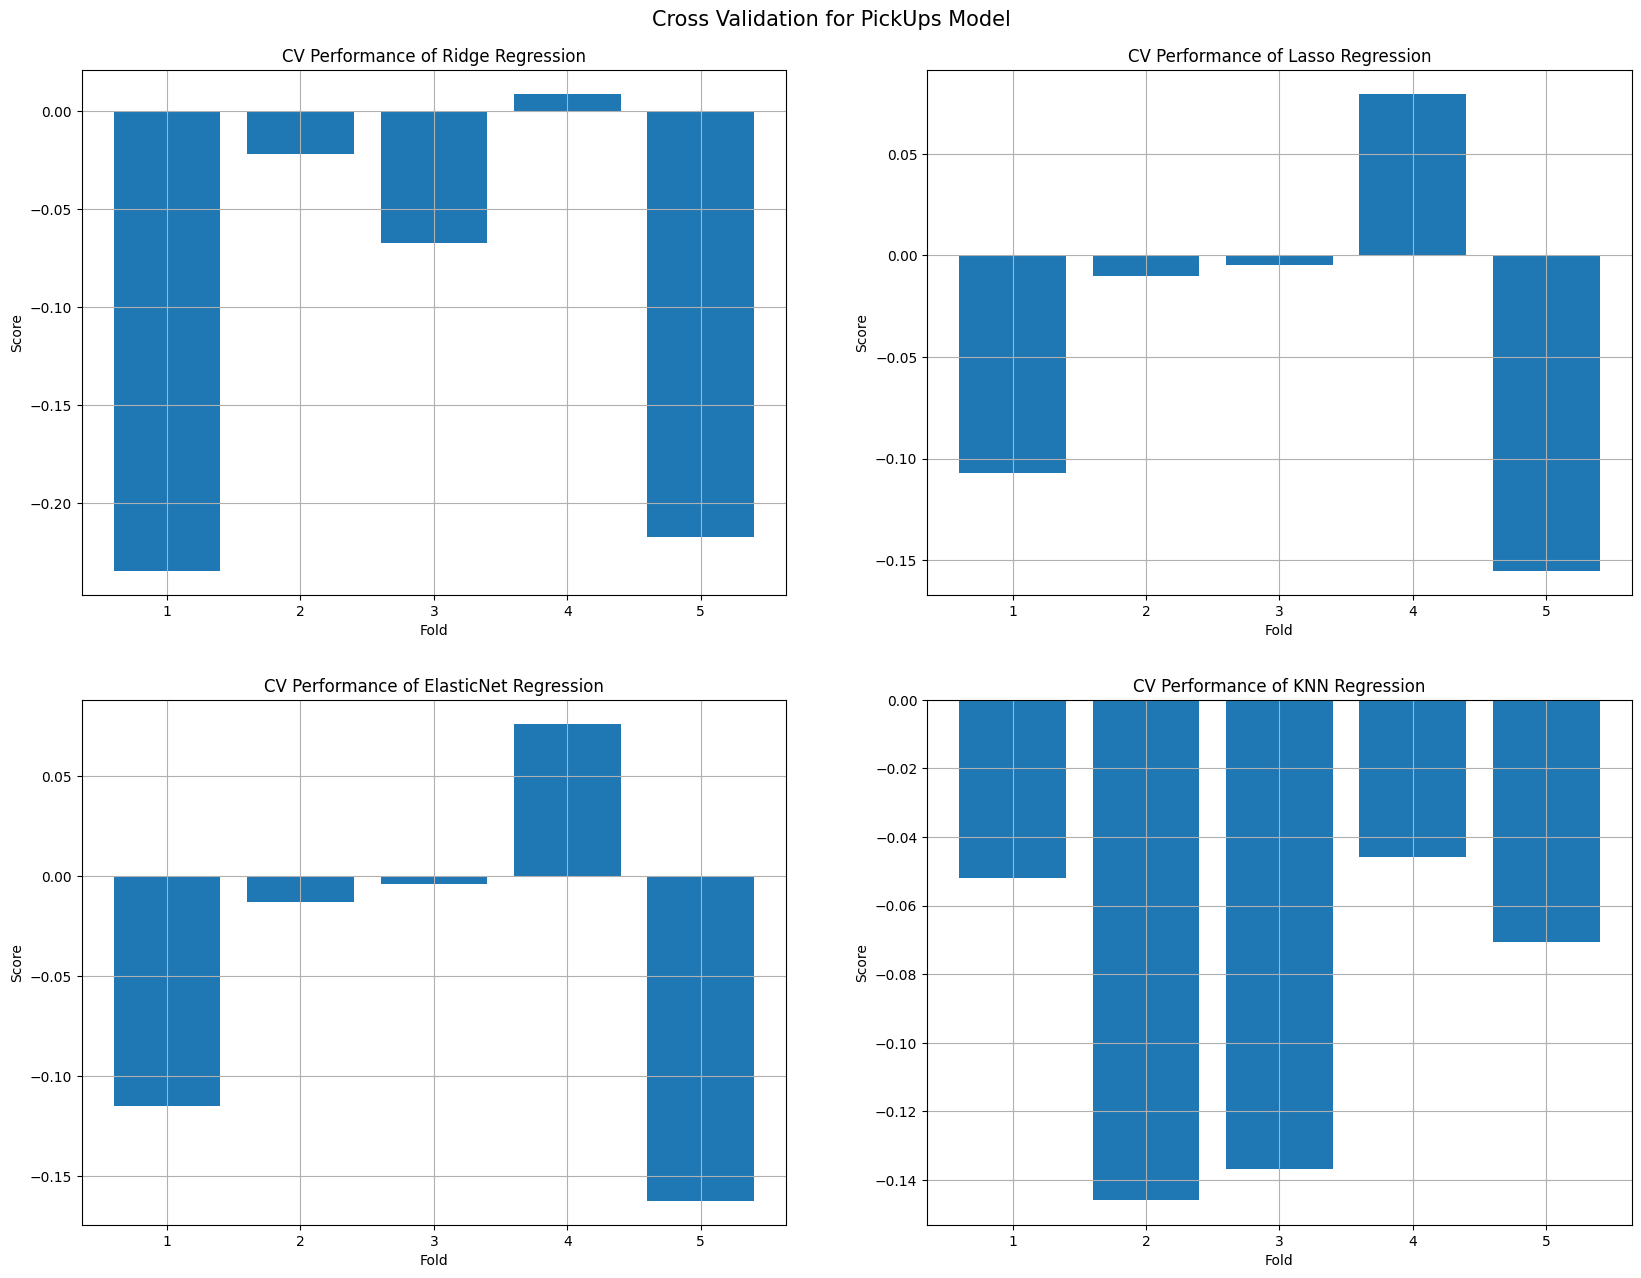

In [115]:
from sklearn.model_selection import cross_val_score
K = 5

# Ridge Regression
Ridge_Reg = Ridge()
Ridge_scores = cross_val_score(Ridge_Reg, X_train, y_train.iloc[:,0], cv= K, scoring = 'r2')
print("Score in each fold:", Ridge_scores)
print("%0.2f accuracy with a standard deviation of %0.2f" % (Ridge_scores.mean(), Ridge_scores.std()))

# Lasso Regression
Lasso_Reg = Lasso()
Lasso_scores = cross_val_score(Lasso_Reg, X_train, y_train.iloc[:,0], cv= K, scoring = 'r2')
print("Score in each fold:", Lasso_scores)
print("%0.2f accuracy with a standard deviation of %0.2f" % (Lasso_scores.mean(), Lasso_scores.std()))

# ElasticNet Regression
ElasticNet_Reg = ElasticNet()
ElasticNet_scores = cross_val_score(ElasticNet_Reg, X_train, y_train.iloc[:,0], cv= K, scoring = 'r2')
print("Score in each fold:", ElasticNet_scores)
print("%0.2f accuracy with a standard deviation of %0.2f" % (ElasticNet_scores.mean(), ElasticNet_scores.std()))

# KNN Regression
KNN_Reg = neighbors.KNeighborsRegressor(n_neighbors = 20)
KNN_scores = cross_val_score(KNN_Reg, X_train, y_train.iloc[:,0], cv= K, scoring = 'r2')
print("Score in each fold:", KNN_scores)
print("%0.2f accuracy with a standard deviation of %0.2f" % (KNN_scores.mean(), KNN_scores.std()))

figure, axis = plt.subplots(2,2, figsize = (20, 15))
axis[0,0].bar(np.arange(1,K+1),Ridge_scores)
axis[0,0].set_title('CV Performance of Ridge Regression')
axis[0,0].grid(visible = True)
axis[0,0].set_xlabel('Fold')
axis[0,0].set_ylabel('Score')
axis[0,1].bar(np.arange(1,K+1),Lasso_scores)
axis[0,1].set_title('CV Performance of Lasso Regression')
axis[0,1].grid(visible = True)
axis[0,1].set_xlabel('Fold')
axis[0,1].set_ylabel('Score')
axis[1,0].bar(np.arange(1,K+1),ElasticNet_scores)
axis[1,0].set_title('CV Performance of ElasticNet Regression')
axis[1,0].grid(visible = True)
axis[1,0].set_xlabel('Fold')
axis[1,0].set_ylabel('Score')
axis[1,1].bar(np.arange(1,K+1),KNN_scores)
axis[1,1].set_title('CV Performance of KNN Regression')
axis[1,1].grid(visible = True)
axis[1,1].set_xlabel('Fold')
axis[1,1].set_ylabel('Score')

figure.suptitle('Cross Validation for PickUps Model', fontsize = 15,y = 0.92)

plt.show()

Score in each fold: [-0.10644232 -0.03043901 -0.09161132 -0.11151362 -0.33965944]
-0.14 accuracy with a standard deviation of 0.11
Score in each fold: [-0.01047252 -0.00664901 -0.04241901 -0.00264193 -0.251777  ]
-0.06 accuracy with a standard deviation of 0.10
Score in each fold: [-0.01224938 -0.00755721 -0.03510411  0.00177021 -0.26115758]
-0.06 accuracy with a standard deviation of 0.10
Score in each fold: [-0.02754086 -0.19774348 -0.13013901 -0.04243704 -0.08734754]
-0.10 accuracy with a standard deviation of 0.06


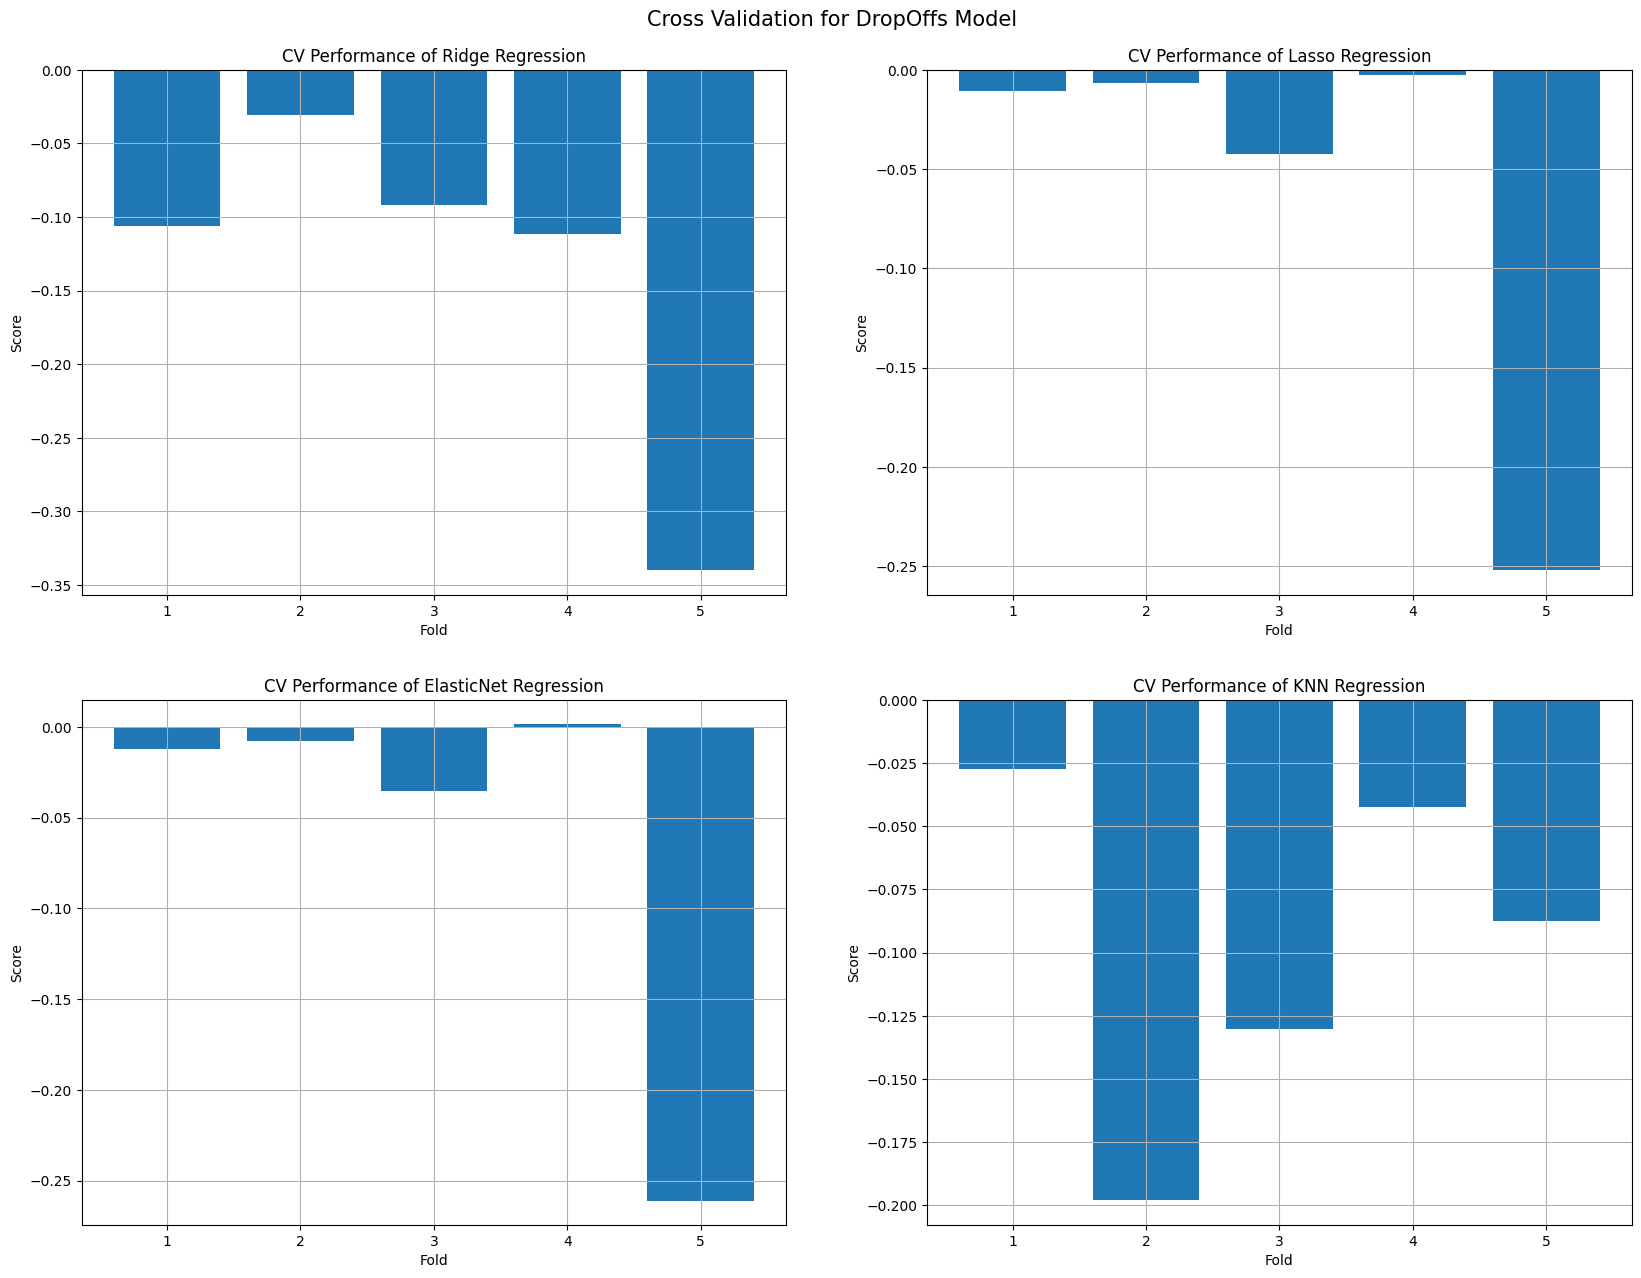

In [116]:
from sklearn.model_selection import cross_val_score
K = 5

# Ridge Regression
Ridge_Reg = Ridge()
Ridge_scores = cross_val_score(Ridge_Reg, X_train, y_train.iloc[:,1], cv= K, scoring = 'r2')
print("Score in each fold:", Ridge_scores)
print("%0.2f accuracy with a standard deviation of %0.2f" % (Ridge_scores.mean(), Ridge_scores.std()))

# Lasso Regression
Lasso_Reg = Lasso()
Lasso_scores = cross_val_score(Lasso_Reg, X_train, y_train.iloc[:,1], cv= K, scoring = 'r2')
print("Score in each fold:", Lasso_scores)
print("%0.2f accuracy with a standard deviation of %0.2f" % (Lasso_scores.mean(), Lasso_scores.std()))

# ElasticNet Regression
ElasticNet_Reg = ElasticNet()
ElasticNet_scores = cross_val_score(ElasticNet_Reg, X_train, y_train.iloc[:,1], cv= K, scoring = 'r2')
print("Score in each fold:", ElasticNet_scores)
print("%0.2f accuracy with a standard deviation of %0.2f" % (ElasticNet_scores.mean(), ElasticNet_scores.std()))

# KNN Regression
KNN_Reg = neighbors.KNeighborsRegressor(n_neighbors = 20)
KNN_scores = cross_val_score(KNN_Reg, X_train, y_train.iloc[:,1], cv= K, scoring = 'r2')
print("Score in each fold:", KNN_scores)
print("%0.2f accuracy with a standard deviation of %0.2f" % (KNN_scores.mean(), KNN_scores.std()))

figure, axis = plt.subplots(2,2, figsize = (20, 15))
axis[0,0].bar(np.arange(1,K+1),Ridge_scores)
axis[0,0].set_title('CV Performance of Ridge Regression')
axis[0,0].grid(visible = True)
axis[0,0].set_xlabel('Fold')
axis[0,0].set_ylabel('Score')
axis[0,1].bar(np.arange(1,K+1),Lasso_scores)
axis[0,1].set_title('CV Performance of Lasso Regression')
axis[0,1].grid(visible = True)
axis[0,1].set_xlabel('Fold')
axis[0,1].set_ylabel('Score')
axis[1,0].bar(np.arange(1,K+1),ElasticNet_scores)
axis[1,0].set_title('CV Performance of ElasticNet Regression')
axis[1,0].grid(visible = True)
axis[1,0].set_xlabel('Fold')
axis[1,0].set_ylabel('Score')
axis[1,1].bar(np.arange(1,K+1),KNN_scores)
axis[1,1].set_title('CV Performance of KNN Regression')
axis[1,1].grid(visible = True)
axis[1,1].set_xlabel('Fold')
axis[1,1].set_ylabel('Score')

figure.suptitle('Cross Validation for DropOffs Model', fontsize = 15,y = 0.92)

plt.show()

<b>Prediction + Min-Cost Strategy</b>

<b>Linear Regression</b>

In [117]:
# Daily PickUps and DropOffs Predictions
df1 = pickups_linear.predict(scale(X_test))
df2 = dropoff_linear.predict(scale(X_test))

ALPHA = 7
BETA = 2

d = {'Actual Bikes deployed (Y-Test)': y_test['pu_ct'], 'Actual Docks deployed (Y-Test)': y_test['do_ct'], 'Linear_PickUps_Pred': pickups_linear.predict(scale(X_test)), 'Linear_DropOffs_Pred': dropoff_linear.predict(scale(X_test))}
Linear_Regression = pd.DataFrame(data = d )

def actual_penalty_QoS(column,A,B):
    globalize = [[ALPHA*(min(column[A],i[0])/column[A]) + BETA*(min(column[B],i[1])/column[B]), str(i)] for i in docks]
    min_summa = max([val[0] for val in globalize])
    index = [i[1] for i in globalize if i[0] == max([val[0] for val in globalize])]
    return min_summa, index

Linear_Regression['Actual_QoS'] = Linear_Regression.apply(actual_penalty_QoS, axis = 1, args=('Actual Bikes deployed (Y-Test)','Actual Docks deployed (Y-Test)'))
Linear_Regression['Actual_QoS'], Linear_Regression['BizDecision'] = zip(*Linear_Regression.Actual_QoS)
Linear_Regression.drop(columns = 'BizDecision', inplace = True)

In [118]:
def predicted_QoS(column,A,B):
    globalize = [[ALPHA*(min(column[A],i[0])/column[A]) + BETA*(min(column[B],i[1])/column[B]), str(i)] for i in docks]
    min_summa = max([val[0] for val in globalize])
    index = [i[1] for i in globalize if i[0] == max([val[0] for val in globalize])]
    return min_summa, index

Linear_Regression['Predicted_QoS'] = Linear_Regression.apply(predicted_QoS, axis = 1, args=('Linear_PickUps_Pred','Linear_DropOffs_Pred'))
Linear_Regression['Predicted_QoS'], Linear_Regression['BizDecision'] = zip(*Linear_Regression.Predicted_QoS)
Linear_Regression['BizDecision'] = Linear_Regression['BizDecision'].str[0]
Linear_Regression['BizDecision'] = Linear_Regression['BizDecision'].map(lambda x: x.lstrip('(').rstrip(')'))
Linear_Regression[['Business Decision - Least Penalty - Bz_Bike','Business Decision - Least Penalty - Bz_Dock']] = Linear_Regression['BizDecision'].str.split(', ', expand = True)
Linear_Regression.drop(columns = 'BizDecision', inplace = True)
Linear_ModelSummary = pd.DataFrame(data = Linear_Regression)
Linear_ModelSummary['Actual_QoS > Predicted_QoS? (0,1)'] = Linear_ModelSummary.apply(lambda row: 1 if row.Actual_QoS < row.Predicted_QoS else 0, axis = 1) 
Linear_ModelSummary.head()

,Actual Bikes deployed (Y-Test),Actual Docks deployed (Y-Test),Linear_PickUps_Pred,Linear_DropOffs_Pred,Actual_QoS,Predicted_QoS,Business Decision - Least Penalty - Bz_Bike,Business Decision - Least Penalty - Bz_Dock,"Actual_QoS > Predicted_QoS? (0,1)"
84,36,42,25.742467,28.218187,3.305556,4.622712,17,0,1
122,32,35,28.268906,28.855821,3.718750,4.209572,17,0,1
28,32,34,24.762251,24.549967,3.718750,4.805702,17,0,1
24,14,15,30.057638,30.999784,7.400000,3.959060,17,0,0
75,30,33,28.470305,27.919820,3.966667,4.179794,17,0,1


In [119]:
len(Linear_ModelSummary[Linear_ModelSummary['Actual_QoS > Predicted_QoS? (0,1)'] == 1])/len(Linear_ModelSummary)

0.5

<b>Ridge Regression</b>

In [120]:
# Daily PickUps and DropOffs Predictions
df1 = pickups_ridge.predict(scale(X_test))
df2 = dropoffs_ridge.predict(scale(X_test))

d = {'Y_test_PickUps': y_test['pu_ct'], 'Y_test_DropOffs': y_test['do_ct'], 'Ridge_PickUps_Pred': pickups_ridge.predict(scale(X_test)), 'Ridge_DropOffs_Pred': dropoffs_ridge.predict(scale(X_test))}
Ridge_Regression = pd.DataFrame(data = d )
Ridge_Regression = Ridge_Regression[['Ridge_PickUps_Pred','Ridge_DropOffs_Pred']]
ModelSummary = Linear_Regression[['Actual Bikes deployed (Y-Test)','Actual Docks deployed (Y-Test)','Actual_QoS']]
Ridge_Regression = pd.merge(ModelSummary,Ridge_Regression, left_index = True, right_index = True)

In [121]:
Ridge_Regression['Predicted_QoS'] = Ridge_Regression.apply(predicted_QoS, axis = 1, args=('Ridge_PickUps_Pred','Ridge_PickUps_Pred'))
Ridge_Regression['Predicted_QoS'], Ridge_Regression['BizDecision'] = zip(*Ridge_Regression.Predicted_QoS)
Ridge_Regression['BizDecision'] = Ridge_Regression['BizDecision'].str[0]
Ridge_Regression['BizDecision'] = Ridge_Regression['BizDecision'].map(lambda x: x.lstrip('(').rstrip(')'))
Ridge_Regression[['Business Decision - Least Penalty - Bz_Bike','Business Decision - Least Penalty - Bz_Dock']] = Ridge_Regression['BizDecision'].str.split(', ', expand = True)
Ridge_Regression.drop(columns = 'BizDecision', inplace = True)
Ridge_ModelSummary = pd.DataFrame(data = Ridge_Regression)
Ridge_ModelSummary['Actual_QoS > Predicted_QoS? (0,1)'] = Ridge_ModelSummary.apply(lambda row: 1 if row.Actual_QoS < row.Predicted_QoS else 0, axis = 1) 
Ridge_ModelSummary = Ridge_ModelSummary[['Business Decision - Least Penalty - Bz_Bike','Business Decision - Least Penalty - Bz_Dock','Actual Bikes deployed (Y-Test)','Actual Docks deployed (Y-Test)',
'Actual_QoS','Predicted_QoS','Actual_QoS > Predicted_QoS? (0,1)']]

Ridge_ModelSummary.head()

,Business Decision - Least Penalty - Bz_Bike,Business Decision - Least Penalty - Bz_Dock,Actual Bikes deployed (Y-Test),Actual Docks deployed (Y-Test),Actual_QoS,Predicted_QoS,"Actual_QoS > Predicted_QoS? (0,1)"
84,17,0,36,42,3.305556,4.486424,1
122,17,0,32,35,3.718750,4.485630,1
28,17,0,32,34,3.718750,4.485694,1
24,17,0,14,15,7.400000,4.485322,0
75,17,0,30,33,3.966667,4.485582,1


In [122]:
len(Ridge_ModelSummary[Ridge_ModelSummary['Actual_QoS > Predicted_QoS? (0,1)'] == 1])/len(Ridge_ModelSummary)

0.5

<b>Lasso Regression</b>

In [123]:
# Daily PickUps and DropOffs Predictions
df1 = pickups_lasso.predict(scale(X_test))
df2 = dropoffs_lasso.predict(scale(X_test))

d = {'Y_test_PickUps': y_test['pu_ct'], 'Y_test_DropOffs': y_test['do_ct'], 'Lasso_PickUps_Pred': pickups_lasso.predict(scale(X_test)), 'Lasso_DropOffs_Pred': dropoffs_lasso.predict(scale(X_test))}
Lasso_Regression = pd.DataFrame(data = d )
Lasso_Regression = Lasso_Regression[['Lasso_PickUps_Pred','Lasso_DropOffs_Pred']]
Lasso_Regression = pd.merge(ModelSummary,Lasso_Regression, left_index = True, right_index = True)
Lasso_Regression.head()

,Actual Bikes deployed (Y-Test),Actual Docks deployed (Y-Test),Actual_QoS,Lasso_PickUps_Pred,Lasso_DropOffs_Pred
84,36,42,3.305556,26.526786,27.955357
122,32,35,3.718750,26.526786,27.955357
28,32,34,3.718750,26.526786,27.955357
24,14,15,7.400000,26.526786,27.955357
75,30,33,3.966667,26.526786,27.955357


In [124]:
Lasso_Regression['Predicted_QoS'] = Lasso_Regression.apply(predicted_QoS, axis = 1, args=('Lasso_PickUps_Pred','Lasso_DropOffs_Pred'))
Lasso_Regression['Predicted_QoS'], Lasso_Regression['BizDecision'] = zip(*Lasso_Regression.Predicted_QoS)
Lasso_Regression['BizDecision'] = Lasso_Regression['BizDecision'].str[0]
Lasso_Regression['BizDecision'] = Lasso_Regression['BizDecision'].map(lambda x: x.lstrip('(').rstrip(')'))
Lasso_Regression[['Business Decision - Least Penalty - Bz_Bike','Business Decision - Least Penalty - Bz_Dock']] = Lasso_Regression['BizDecision'].str.split(', ', expand = True)
Lasso_Regression.drop(columns = 'BizDecision', inplace = True)
Lasso_ModelSummary = pd.DataFrame(data = Lasso_Regression)
Lasso_ModelSummary['Actual_QoS > Predicted_QoS? (0,1)'] = Lasso_ModelSummary.apply(lambda row: 1 if row.Actual_QoS < row.Predicted_QoS else 0, axis = 1) 
Lasso_ModelSummary = Lasso_ModelSummary[['Business Decision - Least Penalty - Bz_Bike','Business Decision - Least Penalty - Bz_Dock','Actual Bikes deployed (Y-Test)','Actual Docks deployed (Y-Test)',
'Actual_QoS','Predicted_QoS','Actual_QoS > Predicted_QoS? (0,1)']]
Lasso_ModelSummary.head()

,Business Decision - Least Penalty - Bz_Bike,Business Decision - Least Penalty - Bz_Dock,Actual Bikes deployed (Y-Test),Actual Docks deployed (Y-Test),Actual_QoS,Predicted_QoS,"Actual_QoS > Predicted_QoS? (0,1)"
84,17,0,36,42,3.305556,4.486032,1
122,17,0,32,35,3.718750,4.486032,1
28,17,0,32,34,3.718750,4.486032,1
24,17,0,14,15,7.400000,4.486032,0
75,17,0,30,33,3.966667,4.486032,1


In [125]:
len(Lasso_ModelSummary[Lasso_ModelSummary['Actual_QoS > Predicted_QoS? (0,1)'] == 1])/len(Lasso_ModelSummary)

0.5

<b>ElasticNet Regression</b>

In [126]:
# Daily PickUps and DropOffs Predictions
df1 = pickUps_ENet.predict(scale(X_test))
df2 = dropOffs_ENet.predict(scale(X_test))

d = {'Y_test_PickUps': y_test['pu_ct'], 'Y_test_DropOffs': y_test['do_ct'], 'ElasticNet_PickUps_Pred': pickUps_ENet.predict(scale(X_test)), 'ElasticNet_DropOffs_Pred': dropOffs_ENet.predict(scale(X_test))}
ElasticNet_Regression = pd.DataFrame(data = d )
ElasticNet_Regression = ElasticNet_Regression[['ElasticNet_PickUps_Pred','ElasticNet_DropOffs_Pred']]
ElasticNet_Regression = pd.merge(ModelSummary,ElasticNet_Regression, left_index = True, right_index = True)
ElasticNet_Regression.head()

,Actual Bikes deployed (Y-Test),Actual Docks deployed (Y-Test),Actual_QoS,ElasticNet_PickUps_Pred,ElasticNet_DropOffs_Pred
84,36,42,3.305556,26.526786,27.955357
122,32,35,3.718750,26.526786,27.955357
28,32,34,3.718750,26.526786,27.955357
24,14,15,7.400000,26.526786,27.955357
75,30,33,3.966667,26.526786,27.955357


In [127]:
ElasticNet_Regression['Predicted_QoS'] = ElasticNet_Regression.apply(predicted_QoS, axis = 1, args=('ElasticNet_PickUps_Pred','ElasticNet_DropOffs_Pred'))
ElasticNet_Regression['Predicted_QoS'], ElasticNet_Regression['BizDecision'] = zip(*ElasticNet_Regression.Predicted_QoS)
ElasticNet_Regression['BizDecision'] = ElasticNet_Regression['BizDecision'].str[0]
ElasticNet_Regression['BizDecision'] = ElasticNet_Regression['BizDecision'].map(lambda x: x.lstrip('(').rstrip(')'))
ElasticNet_Regression[['Business Decision - Least Penalty - Bz_Bike','Business Decision - Least Penalty - Bz_Dock']] = ElasticNet_Regression['BizDecision'].str.split(', ', expand = True)
ElasticNet_Regression.drop(columns = 'BizDecision', inplace = True)
ElasticNet_ModelSummary = pd.DataFrame(data = ElasticNet_Regression)
ElasticNet_ModelSummary['Actual_QoS > Predicted_QoS? (0,1)'] = ElasticNet_ModelSummary.apply(lambda row: 1 if row.Actual_QoS < row.Predicted_QoS else 0, axis = 1) 
ElasticNet_ModelSummary = ElasticNet_ModelSummary[['Business Decision - Least Penalty - Bz_Bike','Business Decision - Least Penalty - Bz_Dock','Actual Bikes deployed (Y-Test)','Actual Docks deployed (Y-Test)',
'Actual_QoS','Predicted_QoS','Actual_QoS > Predicted_QoS? (0,1)']]
ElasticNet_ModelSummary.head()

,Business Decision - Least Penalty - Bz_Bike,Business Decision - Least Penalty - Bz_Dock,Actual Bikes deployed (Y-Test),Actual Docks deployed (Y-Test),Actual_QoS,Predicted_QoS,"Actual_QoS > Predicted_QoS? (0,1)"
84,17,0,36,42,3.305556,4.486032,1
122,17,0,32,35,3.718750,4.486032,1
28,17,0,32,34,3.718750,4.486032,1
24,17,0,14,15,7.400000,4.486032,0
75,17,0,30,33,3.966667,4.486032,1


In [128]:
len(ElasticNet_ModelSummary[ElasticNet_ModelSummary['Actual_QoS > Predicted_QoS? (0,1)'] == 1])/len(ElasticNet_ModelSummary)

0.5

<b>KNN Regression</b>

In [129]:
# Daily PickUps and DropOffs Predictions
df1 = pickups_KNN.predict(scale(X_test))
df2 = dropoffs_KNN.predict(scale(X_test))

d = {'Y_test_PickUps': y_test['pu_ct'], 'Y_test_DropOffs': y_test['do_ct'], 'KNN_PickUps_Pred': pickups_KNN.predict(scale(X_test)), 'KNN_DropOffs_Pred': dropoffs_KNN.predict(scale(X_test))}
KNN_Regression = pd.DataFrame(data = d )
KNN_Regression = KNN_Regression[['KNN_PickUps_Pred','KNN_DropOffs_Pred']]
KNN_Regression = pd.merge(ModelSummary,KNN_Regression, left_index = True, right_index = True)
KNN_Regression.head()

,Actual Bikes deployed (Y-Test),Actual Docks deployed (Y-Test),Actual_QoS,KNN_PickUps_Pred,KNN_DropOffs_Pred
84,36,42,3.305556,22.894737,26.304348
122,32,35,3.718750,30.052632,28.130435
28,32,34,3.718750,27.578947,28.565217
24,14,15,7.400000,27.736842,28.782609
75,30,33,3.966667,29.368421,28.826087


In [130]:
KNN_Regression['Predicted_QoS'] = KNN_Regression.apply(predicted_QoS, axis = 1, args=('KNN_PickUps_Pred','KNN_DropOffs_Pred'))
KNN_Regression['Predicted_QoS'], KNN_Regression['BizDecision'] = zip(*KNN_Regression.Predicted_QoS)
KNN_Regression['BizDecision'] = KNN_Regression['BizDecision'].str[0]
KNN_Regression['BizDecision'] = KNN_Regression['BizDecision'].map(lambda x: x.lstrip('(').rstrip(')'))
KNN_Regression[['Business Decision - Least Penalty - Bz_Bike','Business Decision - Least Penalty - Bz_Dock']] = KNN_Regression['BizDecision'].str.split(', ', expand = True)
KNN_Regression.drop(columns = 'BizDecision', inplace = True)
KNN_ModelSummary = pd.DataFrame(data = KNN_Regression)
KNN_ModelSummary['Actual_QoS > Predicted_QoS? (0,1)'] = KNN_ModelSummary.apply(lambda row: 1 if row.Actual_QoS < row.Predicted_QoS else 0, axis = 1) 
KNN_ModelSummary = KNN_ModelSummary[['Business Decision - Least Penalty - Bz_Bike','Business Decision - Least Penalty - Bz_Dock','Actual Bikes deployed (Y-Test)','Actual Docks deployed (Y-Test)',
'Actual_QoS','Predicted_QoS','Actual_QoS > Predicted_QoS? (0,1)']]
KNN_ModelSummary.head()

,Business Decision - Least Penalty - Bz_Bike,Business Decision - Least Penalty - Bz_Dock,Actual Bikes deployed (Y-Test),Actual Docks deployed (Y-Test),Actual_QoS,Predicted_QoS,"Actual_QoS > Predicted_QoS? (0,1)"
84,17,0,36,42,3.305556,5.197701,1
122,17,0,32,35,3.718750,3.959720,1
28,17,0,32,34,3.718750,4.314885,1
24,17,0,14,15,7.400000,4.290323,0
75,17,0,30,33,3.966667,4.051971,1


In [131]:
len(ElasticNet_ModelSummary[ElasticNet_ModelSummary['Actual_QoS > Predicted_QoS? (0,1)'] == 1])/len(ElasticNet_ModelSummary)

0.5

In [132]:
import pandas as pd

# Define the data
# Define the data for Ridge regressions
data_ridge = {
    '': ['PickUp Count'] * 5 + ['DropOff Count'] * 5,
    'Model': ['Linear Regression', 'Ridge Regression', 'Lasso Regression', 'ElasticNet Regression', 'KNN Regression'] * 2,
    'R2': [pickups_linear.score(scale(X_test), y_test.iloc[:,0]), pickups_ridge.score(scale(X_test), y_test.iloc[:,0]),
                    pickups_lasso.score(scale(X_test), y_test.iloc[:,0]), pickUps_ENet.score(scale(X_test), y_test.iloc[:,0]), pickups_KNN.score(scale(X_test), y_test.iloc[:,0]),
                    dropoff_linear.score(scale(X_test), y_test.iloc[:,1]), dropoffs_ridge.score(scale(X_test), y_test.iloc[:,1]), dropoffs_lasso.score(scale(X_test), y_test.iloc[:,1]),
                    dropOffs_ENet.score(scale(X_test), y_test.iloc[:,1]), dropoffs_KNN.score(scale(X_test), y_test.iloc[:,1])] 
}

# Create DataFrame for Ridge regressions
ridge_prediction_table = pd.DataFrame(data_ridge)
ridge_prediction_table['R2'] = round(ridge_prediction_table['R2'],2)

In [133]:
from IPython.display import HTML
HTML(ridge_prediction_table.to_html(classes = 'table table-stripped', index = False))

,Model,R2
PickUp Count,Linear Regression,-0.21
PickUp Count,Ridge Regression,-0.02
PickUp Count,Lasso Regression,-0.02
PickUp Count,ElasticNet Regression,-0.02
PickUp Count,KNN Regression,-0.07
DropOff Count,Linear Regression,-0.30
DropOff Count,Ridge Regression,-0.02
DropOff Count,Lasso Regression,-0.02
DropOff Count,ElasticNet Regression,-0.02
DropOff Count,KNN Regression,-0.08


In [134]:
import pandas as pd

# Define the data for Ridge regressions
data_ridge = {
    'Strategy': ['Minimum Penalty Strategy'] * 5 + ['Maximum Quality Service'] * 5,
    'Model': ['Linear Regression', 'Ridge Regression', 'Lasso Regression', 'ElasticNet Regression', 'KNN Regression'] * 2,
    'Probability': [0.60,0.60,0.60,0.62,0.58,0.60,0.60,0.62,0.60,0.60] ,  # Initialize with dummy probability values
}

# Manually enter the model prediction values

# Create DataFrame for Ridge regressions
ridge_prediction_table = pd.DataFrame(data_ridge)

# Display the prediction table with Ridge regressions included
HTML(ridge_prediction_table.to_html(classes = 'table table-stripped', index = False))

Strategy,Model,Probability
Minimum Penalty Strategy,Linear Regression,0.60
Minimum Penalty Strategy,Ridge Regression,0.60
Minimum Penalty Strategy,Lasso Regression,0.60
Minimum Penalty Strategy,ElasticNet Regression,0.62
Minimum Penalty Strategy,KNN Regression,0.58
Maximum Quality Service,Linear Regression,0.60
Maximum Quality Service,Ridge Regression,0.60
Maximum Quality Service,Lasso Regression,0.62
Maximum Quality Service,ElasticNet Regression,0.60
Maximum Quality Service,KNN Regression,0.60


In [136]:
import pandas as pd

K = 5

# Linear Regression
Linear_Reg = LinearRegression()
Linear_scores = cross_val_score(Linear_Reg, X_train, y_train.iloc[:,1], cv= K, scoring = 'r2')
print("Score in each fold:", Linear_scores)
print("%0.2f accuracy with a standard deviation of %0.2f" % (Linear_scores.mean(), Linear_scores.std()))

# # Ridge Regression
Ridge_Reg = Ridge()
Ridge_scores = cross_val_score(Ridge_Reg, X_train, y_train.iloc[:,1], cv= K, scoring = 'r2')
print("Score in each fold:", Ridge_scores)
print("%0.2f accuracy with a standard deviation of %0.2f" % (Ridge_scores.mean(), Ridge_scores.std()))

# Lasso Regression
Lasso_Reg = Lasso()
Lasso_scores = cross_val_score(Lasso_Reg, X_train, y_train.iloc[:,1], cv= K, scoring = 'r2')
print("Score in each fold:", Lasso_scores)
print("%0.2f accuracy with a standard deviation of %0.2f" % (Lasso_scores.mean(), Lasso_scores.std()))

# ElasticNet Regression
ElasticNet_Reg = ElasticNet()
ElasticNet_scores = cross_val_score(ElasticNet_Reg, X_train, y_train.iloc[:,1], cv= K, scoring = 'r2')
print("Score in each fold:", ElasticNet_scores)
print("%0.2f accuracy with a standard deviation of %0.2f" % (ElasticNet_scores.mean(), ElasticNet_scores.std()))

# KNN Regression
KNN_Reg = neighbors.KNeighborsRegressor(n_neighbors = 23)
KNN_scores = cross_val_score(KNN_Reg, X_train, y_train.iloc[:,1], cv= K, scoring = 'r2')
print("Score in each fold:", KNN_scores)
print("%0.2f accuracy with a standard deviation of %0.2f" % (KNN_scores.mean(), KNN_scores.std()))

pickupscores_mean = [Linear_scores.mean(),Ridge_scores.mean(), Lasso_scores.mean(), ElasticNet_scores.mean(), KNN_scores.mean()]

pickupscores_mean = [round(i,2) for i in pickupscores_mean]

pickupscores_sd = [Linear_scores.std(), Ridge_scores.std(), Lasso_scores.std(), ElasticNet_scores.std(), KNN_scores.std()]

pickupscores_sd = [round(i,2) for i in pickupscores_sd]

dropoffs_mean = [Linear_scores.mean(), Ridge_scores.mean(), Lasso_scores.mean(), ElasticNet_scores.mean(), KNN_scores.mean()]

dropoffs_mean = [round(i,2) for i in dropoffs_mean]

dropoffs_sd = [Linear_scores.std(), Ridge_scores.std(), Lasso_scores.std(), ElasticNet_scores.std(), KNN_scores.std()]

dropoffs_sd = [round(i,2) for i in dropoffs_sd]

# Define the data for Ridge regressions
data_ridge = {
    'Model': ['Linear Regression', 'Ridge Regression', 'Lasso Regression', 'ElasticNet Regression', 'KNN Regression'],
    'PickUps Accuracy': pickupscores_mean,
    'PickUps SD':pickupscores_sd,
    'DropOffs Accuracy': dropoffs_mean ,
    'DropOffs SD': dropoffs_sd   # Initialize with dummy probability values
}

# Manually enter the model prediction values

# Create DataFrame for Ridge regressions
ridge_prediction_table = pd.DataFrame(data_ridge)

# Display the prediction table with Ridge regressions included
HTML(ridge_prediction_table.to_html(classes = 'table table-stripped', index = False))

Score in each fold: [-0.63114009 -0.029749   -0.23736977 -0.16266873 -0.41301073]
-0.29 accuracy with a standard deviation of 0.21
Score in each fold: [-0.10644232 -0.03043901 -0.09161132 -0.11151362 -0.33965944]
-0.14 accuracy with a standard deviation of 0.11
Score in each fold: [-0.01047252 -0.00664901 -0.04241901 -0.00264193 -0.251777  ]
-0.06 accuracy with a standard deviation of 0.10
Score in each fold: [-0.01224938 -0.00755721 -0.03510411  0.00177021 -0.26115758]
-0.06 accuracy with a standard deviation of 0.10
Score in each fold: [ 0.01261385 -0.15303045 -0.13884104 -0.12603822 -0.12465531]
-0.11 accuracy with a standard deviation of 0.06


Model,PickUps Accuracy,PickUps SD,DropOffs Accuracy,DropOffs SD
Linear Regression,-0.29,0.21,-0.29,0.21
Ridge Regression,-0.14,0.11,-0.14,0.11
Lasso Regression,-0.06,0.10,-0.06,0.10
ElasticNet Regression,-0.06,0.10,-0.06,0.10
KNN Regression,-0.11,0.06,-0.11,0.06
